# Цель лабораторной работы

изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

# Задание

1. Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
2. Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
   1) масштабирование признаков (не менее чем тремя способами);
   2) обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
   3) обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
   4) отбор признаков:
      * один метод из группы методов фильтрации (filter methods);
      * один метод из группы методов обертывания (wrapper methods);
      * один метод из группы методов вложений (embedded methods).

# Ход выполнения работы

## Текстовое описание наборов данных

В данной лабораьорной работе будут использоваться 2 набора данных:

* Датасет рейтингов университетов для всего, кроме обработки нестандартных признаков
* Датасет погоды на пляжных станциях для обработки нестандартных признаков.

### Датасет рейтингов университетов

В качестве набора данных используется dataset рейтингов университетов мира на основании трёх рейтингов. Датасет доступен по адресу: https://www.kaggle.com/mylesoneill/world-university-rankings

Из набора данных будет рассматриваться только файл `cwurData.csv`.

Описание столбцов:
* `world_rank` - мировой рейтинг университета
* `institution` - название университета
* `country` - страна, в которой расположен университет
* `national_rank` - рейтинг университета в стране его нахождения
* `quality_of_education` - рейтинг качества образования
* `quality_of_faculty` - рейтинг качества профессорско-преподавательского состава
* `publications` - рейтинг публикаций
* `infuence` - рейтинг влияния
* `citations` - количество студентов в университете
* `broad_impact` - рейтинг за широкое влияние (предоставлен только за 2014 и 2015 гг. Остальное - пропуски)
* `patents` - рейтинг за патенты
* `score` - общий балл, используемый для определения мирового рейтинга
* `year` - год рейтинга (с 2012 по 2015 год)

### Датасет погоды на пляжных станциях

В качестве набора данных используется датасет, содержащий информацию о погоде на пляжных станциях. Датасет доступен по адресу: https://www.kaggle.com/datasets/sanjanchaudhari/beach-weather-stations

Этот набор данных содержит единственный файл `Beach_Weather_Stations_-_Automated_Sensors.csv`

Описание столбцов:

* `Station Name` - название станции, с которой измеряется погода
* `Measurement Timestamp` - дата и время измерения
* `Air Temperature` - температура воздуха
* `Wet Bulb Temperature` - температура влажного термометра
* `Humidity` - влажность воздуха
* `Rain Intensity` - интенсивность дождя
* `Interval Rain` - интервалл между дождями
* `Total Rain` - всего дождя
* `Precipitation Type` - тип осадков
* `Wind Direction` - направление ветра
* `Wind Speed` - скорость ветра
* `Maximum Wind Speed` - максимальная скорость ветра
* `Barometric Pressure` - атмосферное давление
* `Solar Radiation` - солнечная радиация
* `Heading` - заголовок/рубрика
* `Battery Life` - срок службы батареи
* `Measurement Timestamp Label` - метка времени измерения

## Основные характеристики набора данных

Подключаем все необходимые библиотеки

In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso

Подключаем Dataset

In [4]:
data = pd.read_csv('cwurData.csv', sep=",")

Размер набора данных

In [5]:
data.shape

(2200, 14)

Типы колонок

In [6]:
data.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

Проверяем, есть ли пропущенные значения

In [7]:
data.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

Первые 5 строк датасета

In [8]:
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [9]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2200


Процент пропусков в `broad_impact`

In [10]:
(200 / 2200) * 100

9.090909090909092

Настройка отображения графиков

In [11]:
# Задание формата графиков для сохранения высокого качества PNG
from IPython.display import set_matplotlib_formats
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
# Задание ширины графиков, чтобы они помещались на A4

## Обработка пропусков данных

### Очистка строк

Можно очистить строки, содержащие пропуски. При этом останутся данные только за 2014 и 2015 гг (см. описание датасета)

In [12]:
# Удаление строк, содержащих пустые значения
data_no_null = data.dropna(axis=0, how='any')
(data.shape, data_no_null.shape)

((2200, 14), (2000, 14))

Выведем первые 11 строк, чтобы убедиться, что данные в `national_rank` числовые (Jupyter Lab в предпросмотре CSV показывает не совсем верно)

In [13]:
data_no_null.head(11)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014
205,6,Columbia University,USA,4,13,8,9,14,13,9,13.0,4,97.41,2014
206,7,"University of California, Berkeley",USA,5,4,22,6,7,4,3,7.0,28,92.84,2014
207,8,University of Chicago,USA,6,10,14,8,17,19,10,18.0,149,92.03,2014
208,9,Princeton University,USA,7,5,16,3,70,25,19,41.0,204,88.56,2014
209,10,Yale University,USA,8,9,25,11,18,7,32,19.0,45,88.11,2014


In [14]:
total_count = data_no_null.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2000


### Внедрение значений

In [15]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка broad_impact. Тип данных float64. Количество пустых значений 200, 10.0%.


In [16]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,broad_impact
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2195,969.0
2196,981.0
2197,975.0
2198,975.0


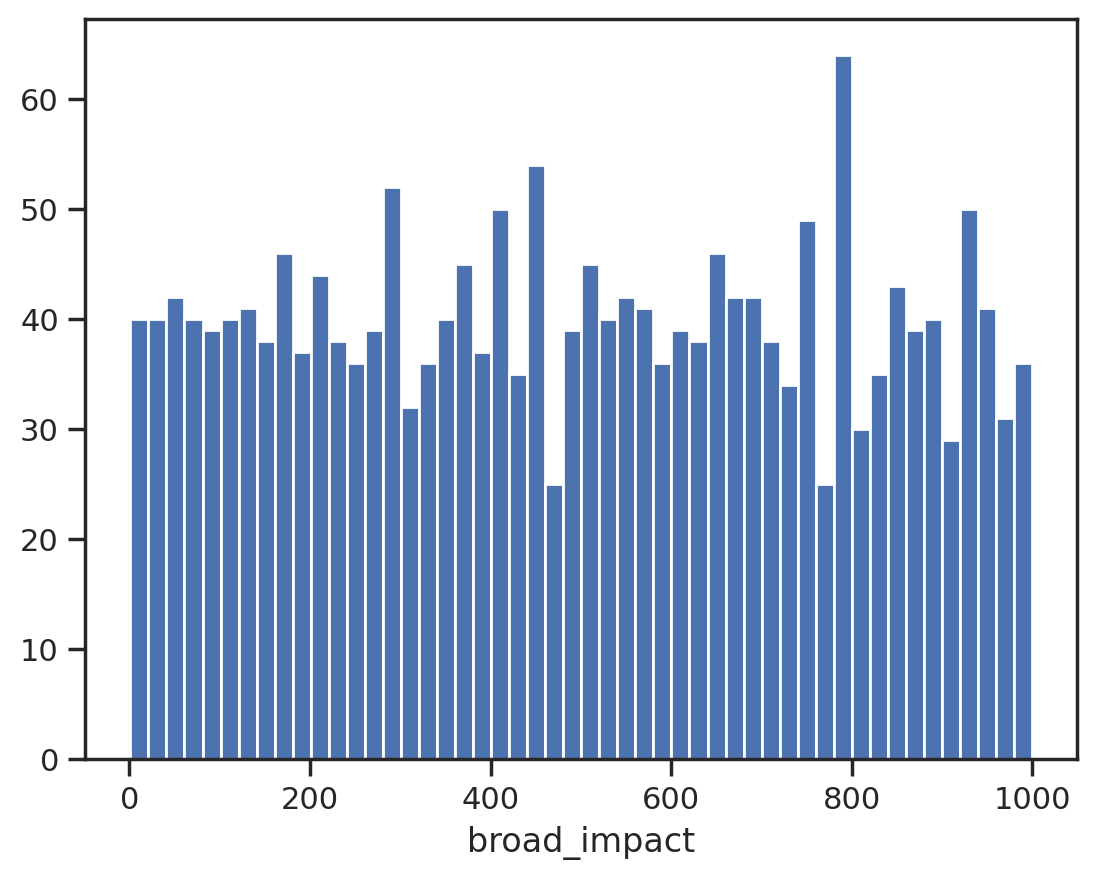

In [17]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html

In [18]:
data_num_MasVnrArea = data_num[['broad_impact']]
data_num_MasVnrArea.head()

,broad_impact
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [19]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [20]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

С помощью класса [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) проверим импьютацию различными [показателями центра распределения](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B8_%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F)

In [21]:
strategies=['mean', 'median', 'most_frequent']

In [22]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_MasVnrArea)
    return data_num_imp[mask_missing_values_only]

In [23]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 4

In [24]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 4

In [25]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 

In [26]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [27]:
data[['broad_impact']].describe()

,broad_impact
count,2000.000000
mean,496.699500
std,286.919755
min,1.000000
25%,250.500000
50%,496.000000
75%,741.000000
max,1000.000000


In [28]:
test_num_impute_col(data, 'broad_impact', strategies[0])

('broad_impact', 'mean', 200, 496.6995, 496.6995)

In [29]:
test_num_impute_col(data, 'broad_impact', strategies[1])

('broad_impact', 'median', 200, 496.0, 496.0)

In [30]:
test_num_impute_col(data, 'broad_impact', strategies[2])

('broad_impact', 'most_frequent', 200, 642.0, 642.0)

## Кодирование категориальных признаков

Преобразуем названия стран, городов, ... в числовые зеачения (label encoding)

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

======> `institution` <==========

In [32]:
le = LabelEncoder()
institution_le = le.fit_transform(data_no_null['institution'])

In [33]:
data_no_null['institution'].unique()

array(['Harvard University', 'Stanford University',
       'Massachusetts Institute of Technology', ...,
       'Babeș-Bolyai University', 'Henan Normal University',
       'Southwest Jiaotong University'], dtype=object)

In [34]:
arr_institution_encoded = np.unique(institution_le)
arr_institution_encoded

array([   0,    1,    2, ..., 1020, 1021, 1022])

In [35]:
le.inverse_transform([n for n in range(1023)])

array(['AGH University of Science and Technology', 'Aalborg University',
       'Aalto University', ..., 'École normale supérieure de Cachan',
       'École normale supérieure de Lyon', 'Örebro University'],
      dtype=object)

======> `country` <==========

In [36]:
le_country = LabelEncoder()
country_le = le_country.fit_transform(data_no_null['country'])

In [37]:
data_no_null['country'].unique()

array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
       'South Korea', 'Canada', 'France', 'Russia', 'China', 'Taiwan',
       'Sweden', 'Singapore', 'Denmark', 'Germany', 'Netherlands',
       'Italy', 'Belgium', 'Australia', 'Finland', 'Norway',
       'South Africa', 'Spain', 'Brazil', 'Hong Kong', 'Ireland',
       'Austria', 'New Zealand', 'Portugal', 'Thailand', 'Czech Republic',
       'Malaysia', 'India', 'Greece', 'Mexico', 'Hungary', 'Argentina',
       'Turkey', 'Poland', 'Saudi Arabia', 'Chile', 'Iceland', 'Slovenia',
       'Estonia', 'Lebanon', 'Croatia', 'Colombia', 'Slovak Republic',
       'Iran', 'Egypt', 'Serbia', 'Bulgaria', 'Lithuania', 'Uganda',
       'United Arab Emirates', 'Uruguay', 'Cyprus', 'Romania',
       'Puerto Rico'], dtype=object)

In [38]:
np.unique(country_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58])

In [39]:
le_country.inverse_transform([n for n in range(59)])

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Lebanon', 'Lithuania', 'Malaysia', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Puerto Rico',
       'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Singapore',
       'Slovak Republic', 'Slovenia', 'South Africa', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey',
       'USA', 'Uganda', 'United Arab Emirates', 'United Kingdom',
       'Uruguay'], dtype=object)

In [40]:
data_no_null.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014


In [41]:
data_digit = data_no_null.copy()
#data_digit.pop('institution')
#data_digit.pop('country')
data_digit["institution"] = institution_le
data_digit['country'] = country_le
data_digit

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,184,54,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,511,54,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,312,54,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,637,57,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,819,57,2,7,12,10,11,12,11,12.0,16,97.51,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,954,37,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,11,14,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,132,4,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,576,48,40,367,567,218,886,974,812,975.0,651,44.02,2015


Проверяем типы данных

In [42]:
data_digit.dtypes

world_rank                int64
institution               int64
country                   int64
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

## Масштабирование данных

Масштабирование пудем проводить на `data_digit` (где нет категориальных признаков)

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

### MinMax масштабирование

=====> `broad_impact` <=====

In [44]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_digit[['broad_impact']])

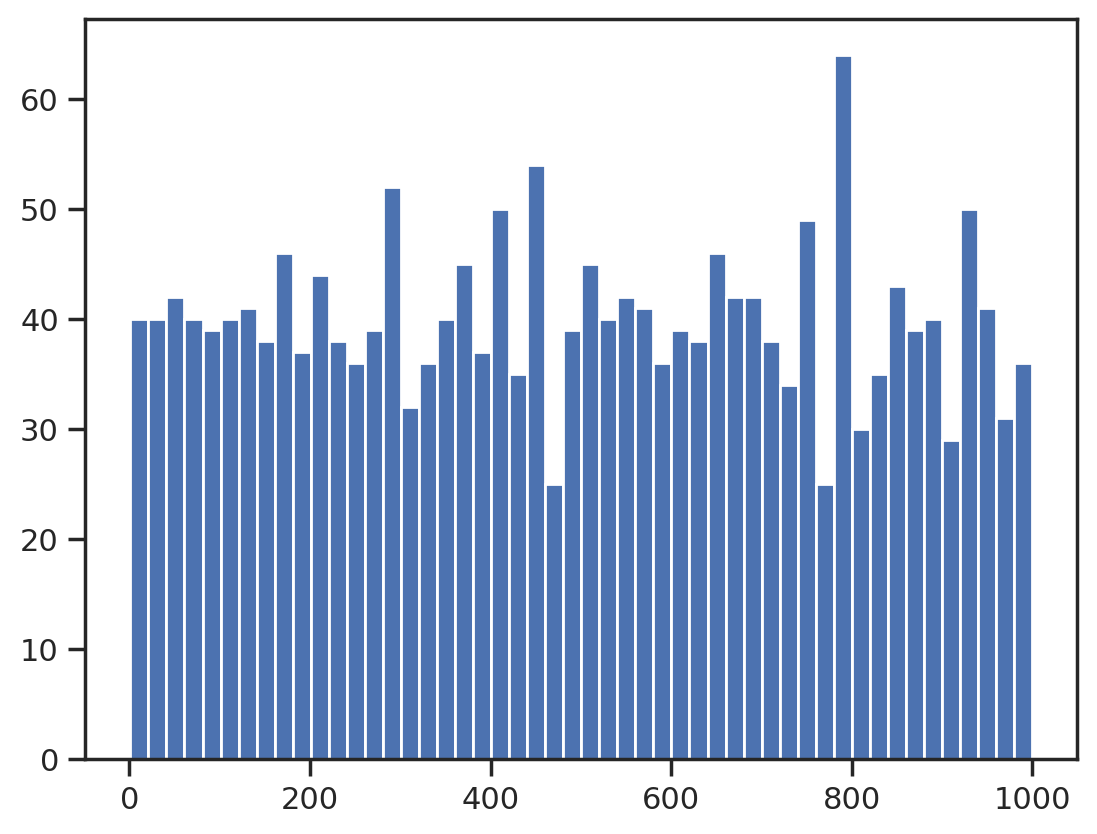

In [45]:
plt.hist(data_digit['broad_impact'], 50)
plt.show()

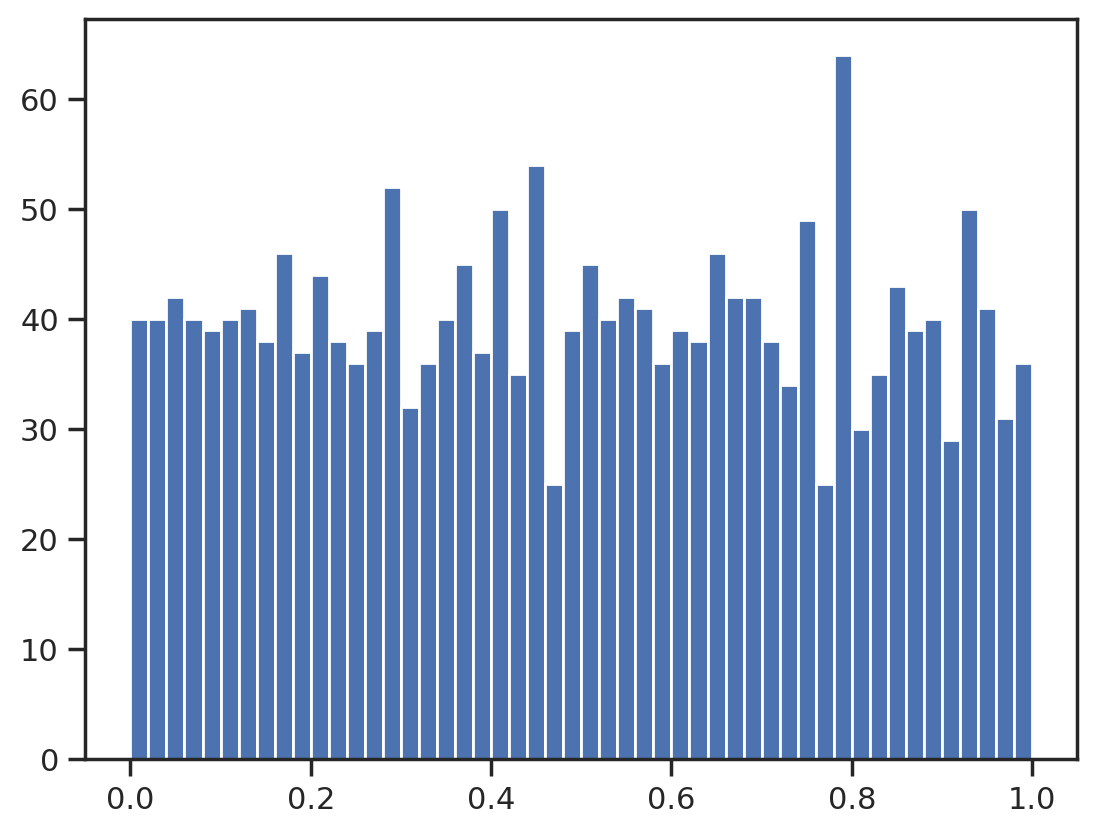

In [46]:
plt.hist(sc1_data, 50)
plt.show()

=====> `world_rank` <=====

In [47]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_digit[['broad_impact']])

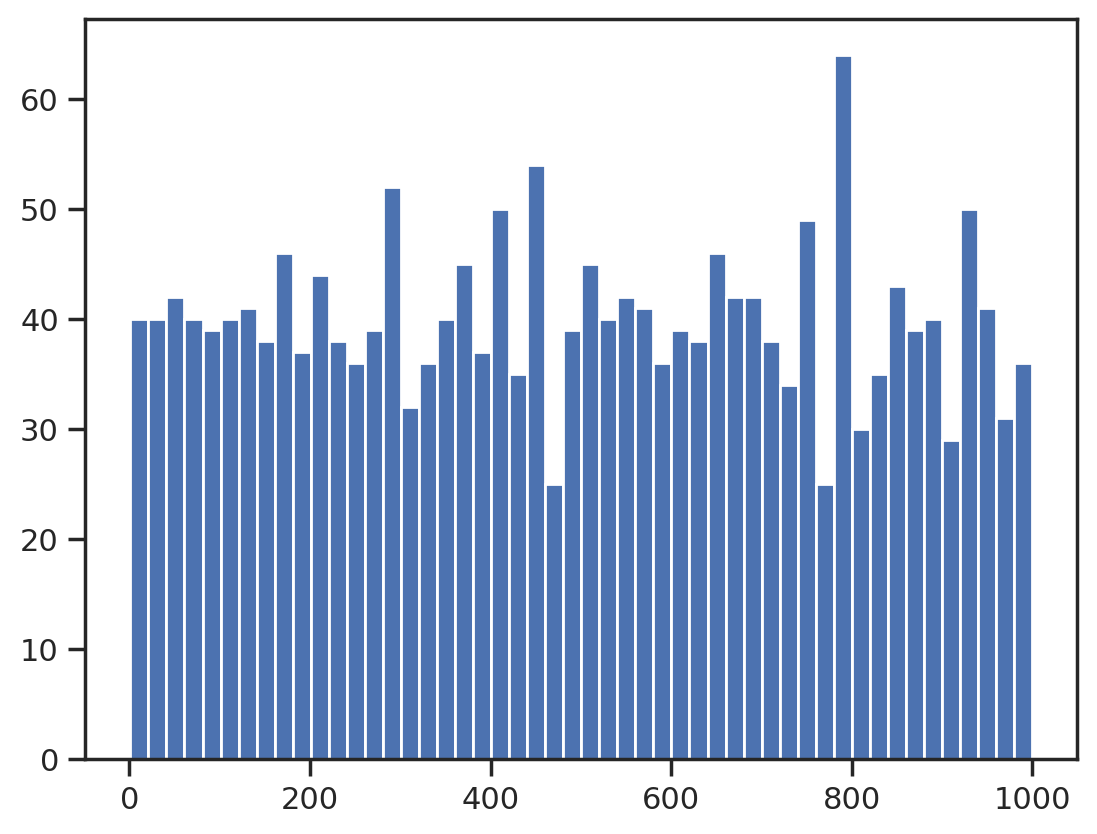

In [48]:
plt.hist(data_digit['broad_impact'], 50)
plt.show()

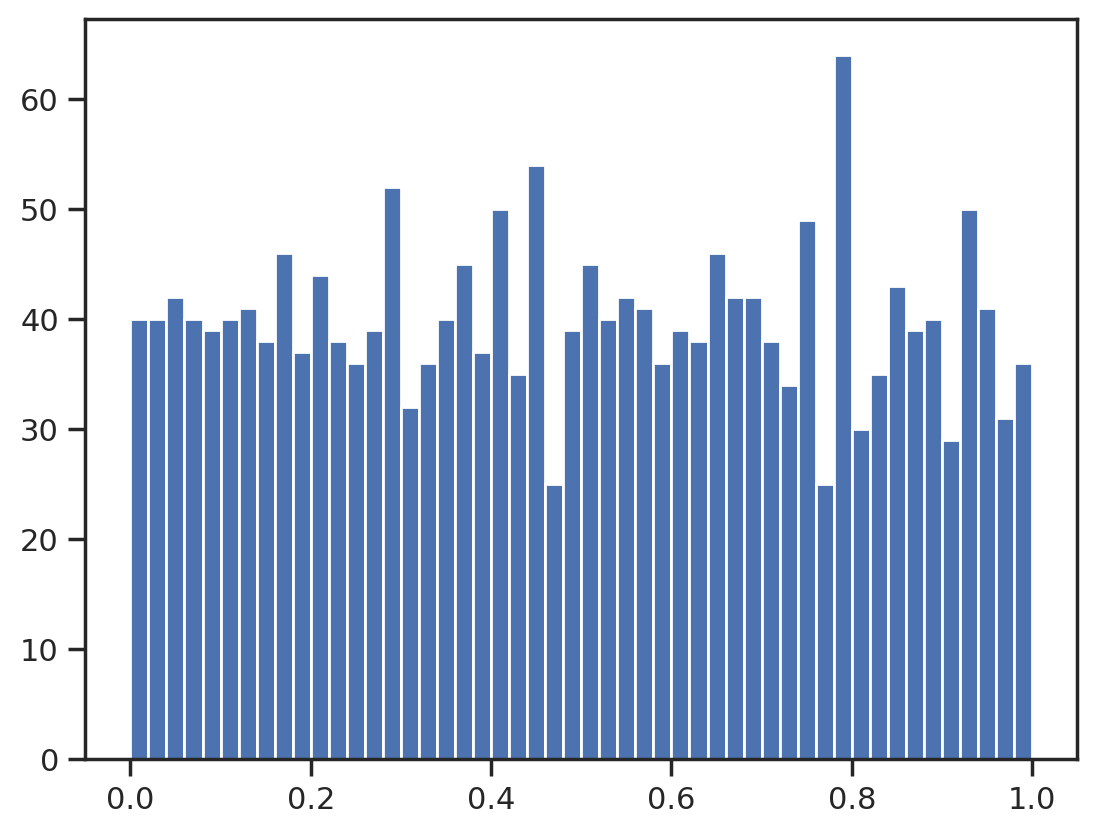

In [49]:
plt.hist(sc1_data, 50)
plt.show()

=====> `institution` <=====

In [50]:
sc2 = MinMaxScaler()
sc2_data = sc2.fit_transform(data_digit[['institution']])

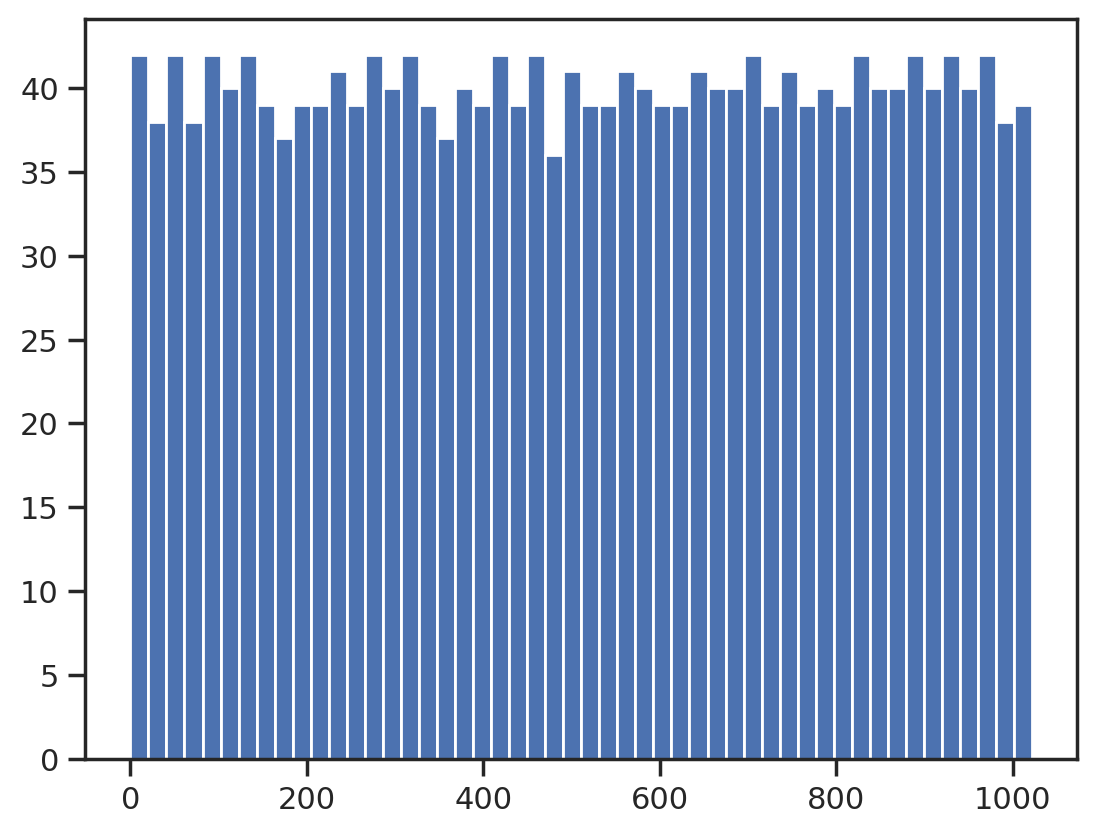

In [51]:
plt.hist(data_digit['institution'], 50)
plt.show()

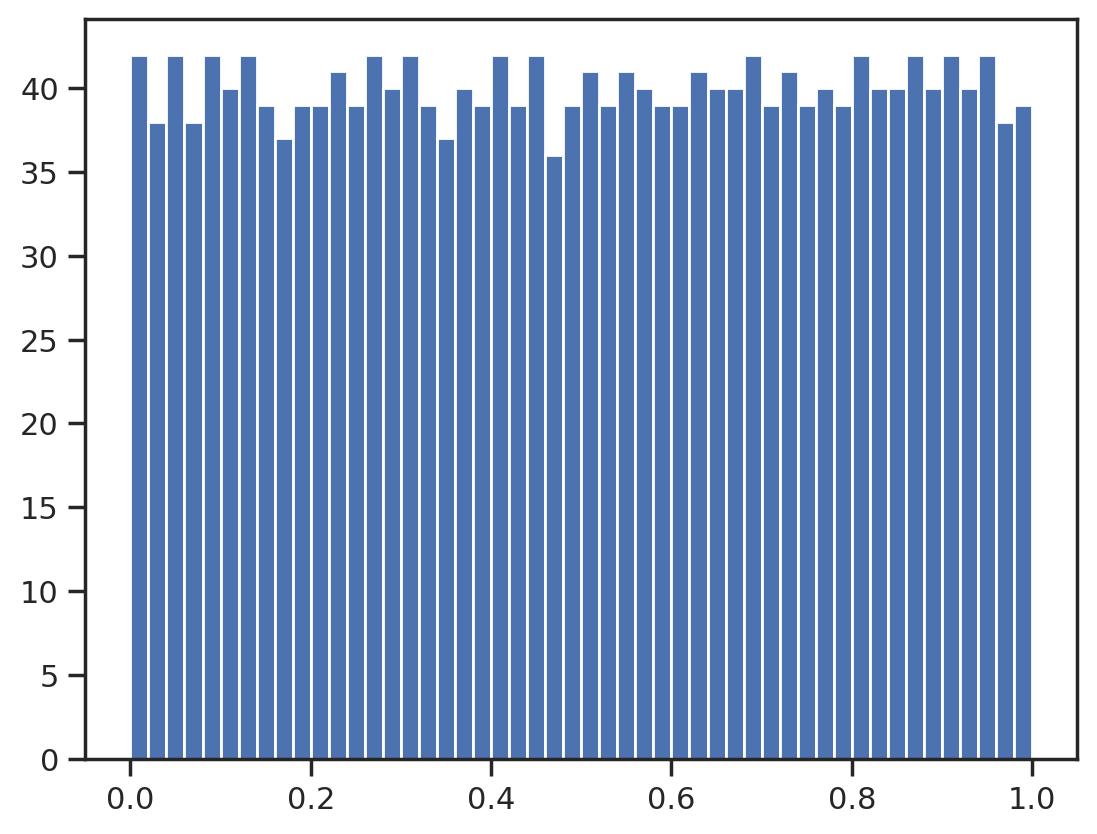

In [52]:
plt.hist(sc2_data, 50)
plt.show()

=====> `country` <=====

In [53]:
sc3 = MinMaxScaler()
sc3_data = sc3.fit_transform(data_digit[['country']])

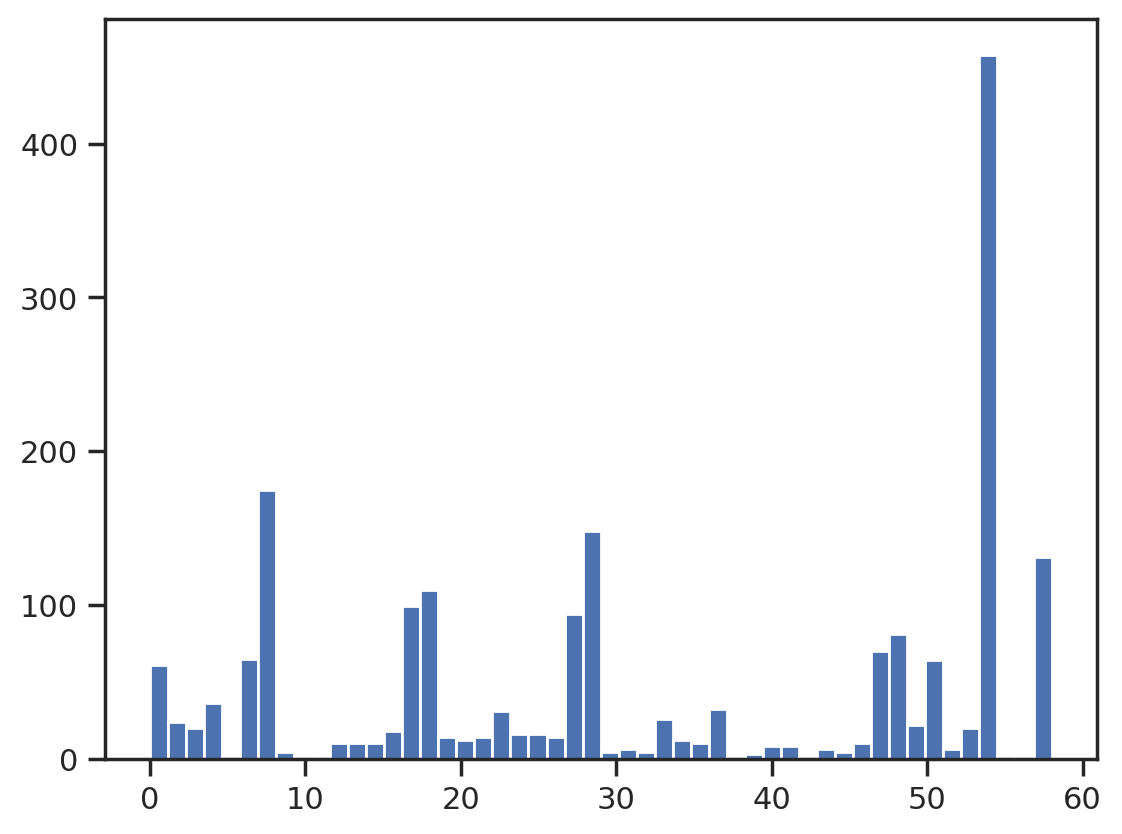

In [54]:
plt.hist(data_digit['country'], 50)
plt.show()

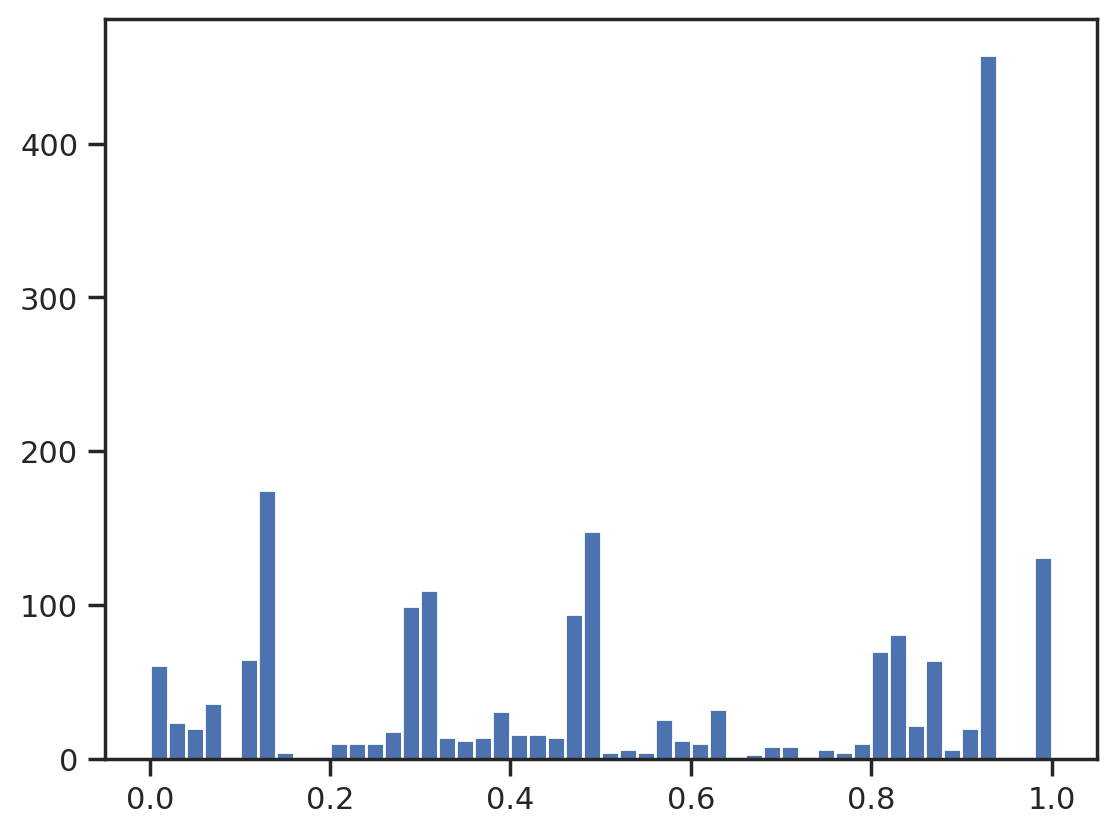

In [55]:
plt.hist(sc3_data, 50)
plt.show()

=====> `national_rank` <=====

In [56]:
sc4 = MinMaxScaler()
sc4_data = sc4.fit_transform(data_digit[['national_rank']])

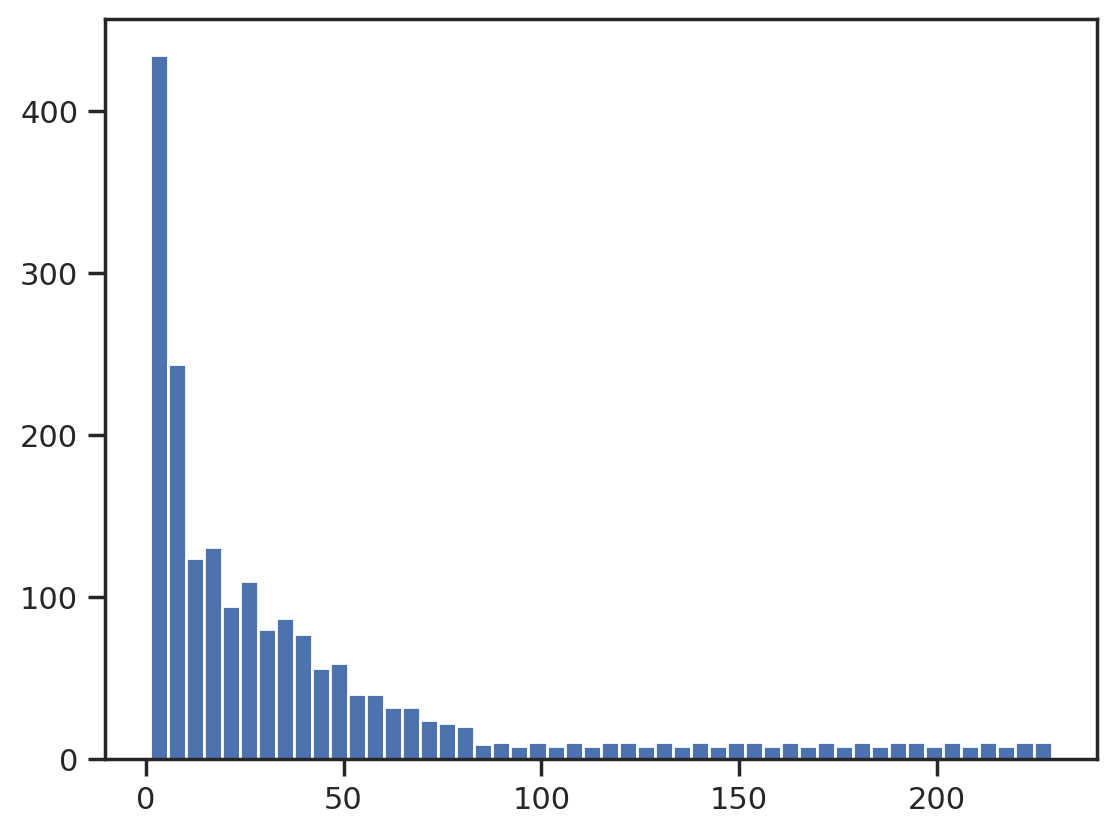

In [57]:
plt.hist(data_digit['national_rank'], 50)
plt.show()

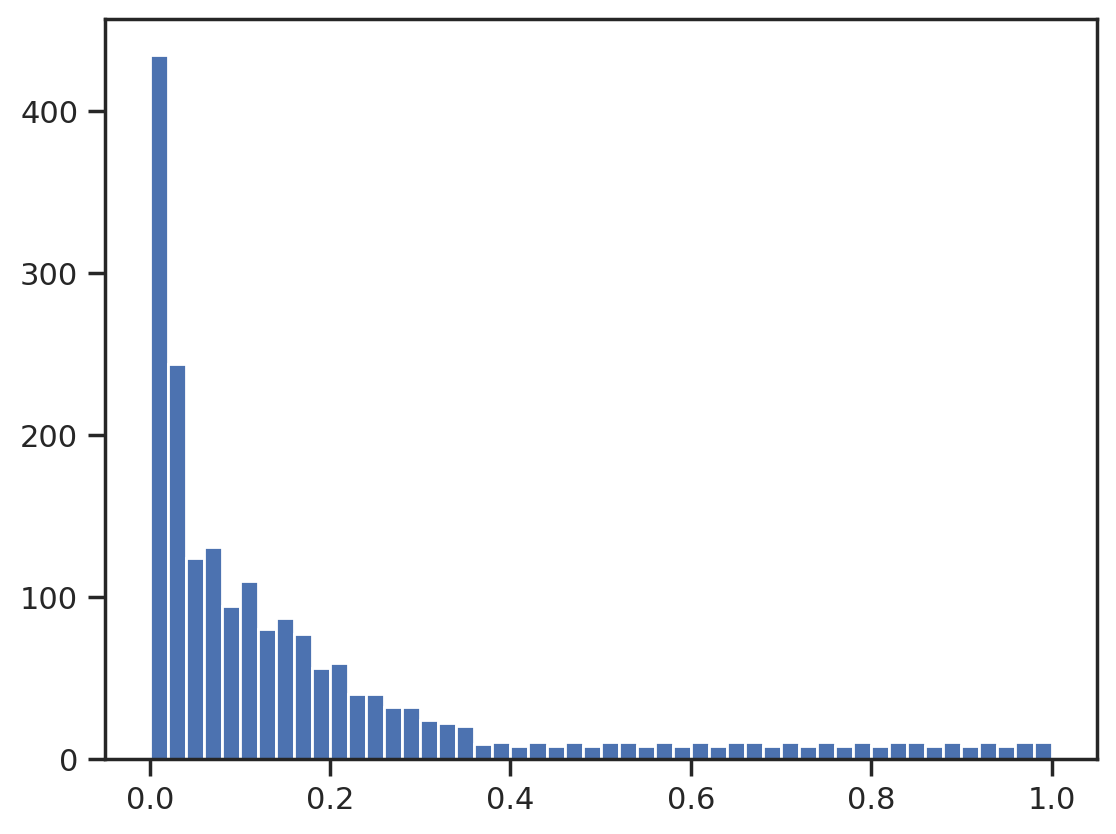

In [58]:
plt.hist(sc4_data, 50)
plt.show()

=====> `quality_of_education` <=====

In [59]:
sc5 = MinMaxScaler()
sc5_data = sc5.fit_transform(data_digit[['quality_of_education']])

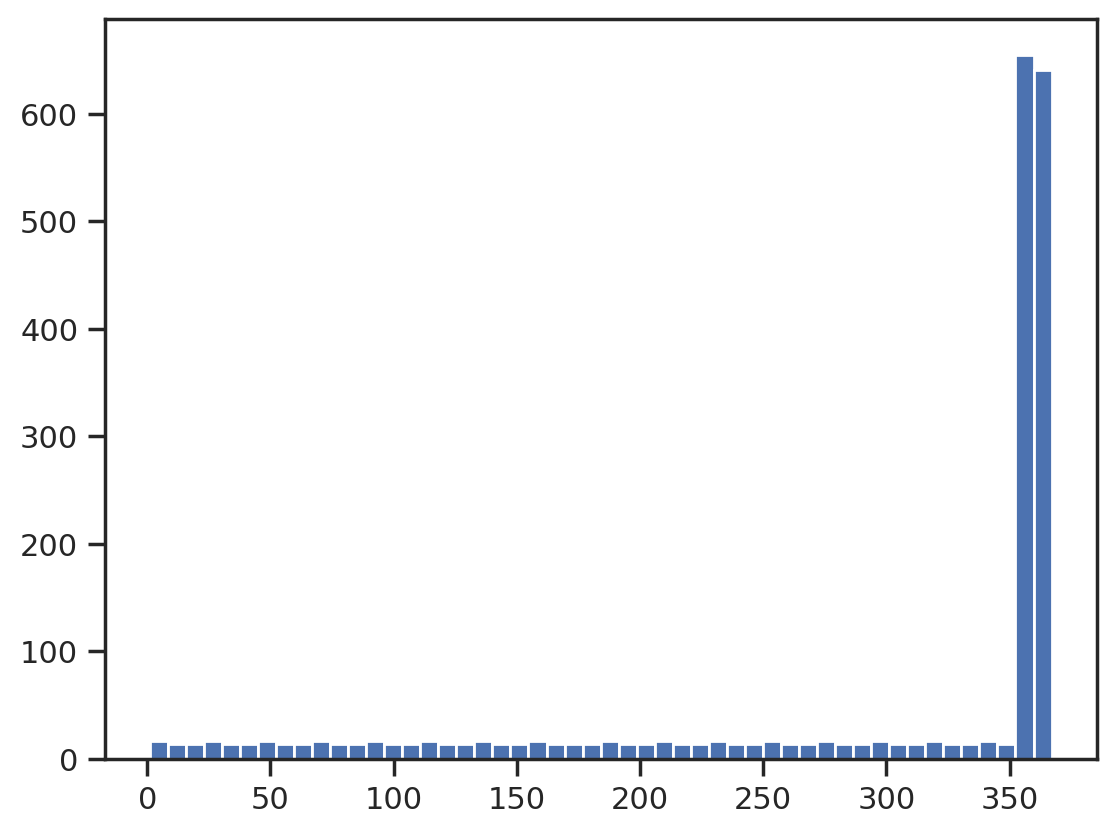

In [60]:
plt.hist(data_digit['quality_of_education'], 50)
plt.show()

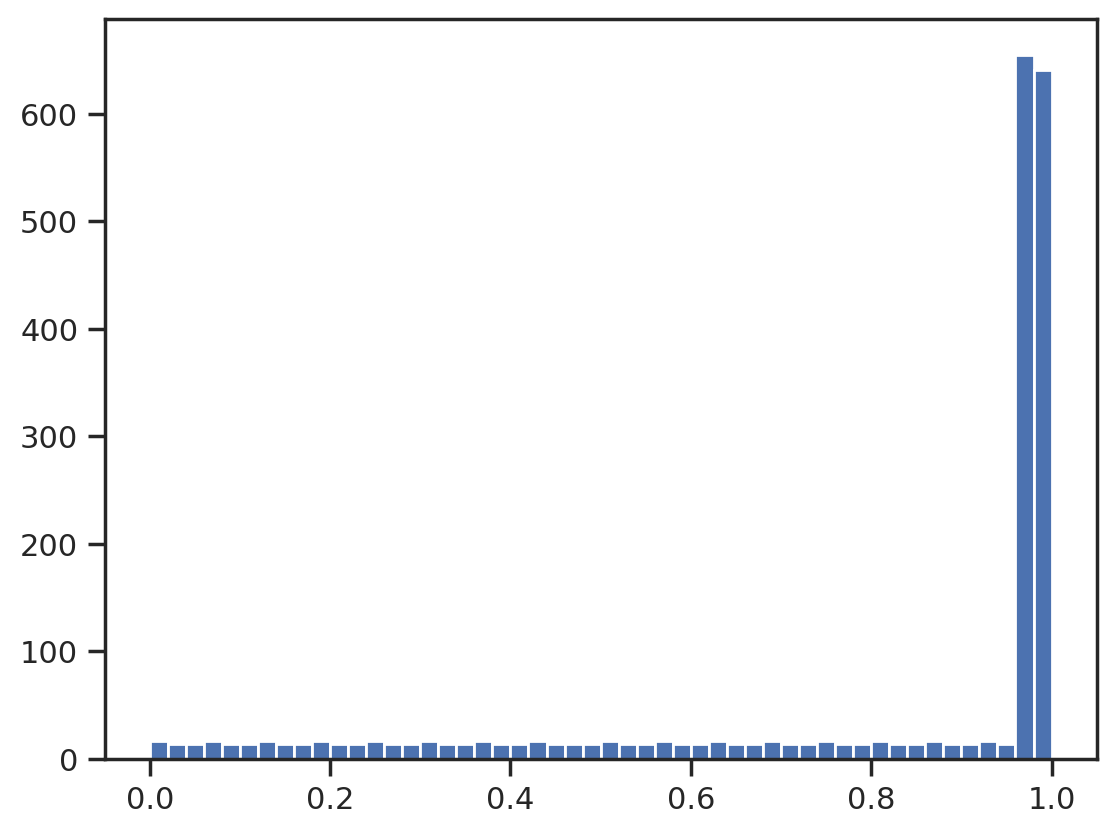

In [61]:
plt.hist(sc5_data, 50)
plt.show()

=====> `alumni_employment` <=====

In [62]:
sc6 = MinMaxScaler()
sc6_data = sc6.fit_transform(data_digit[['alumni_employment']])

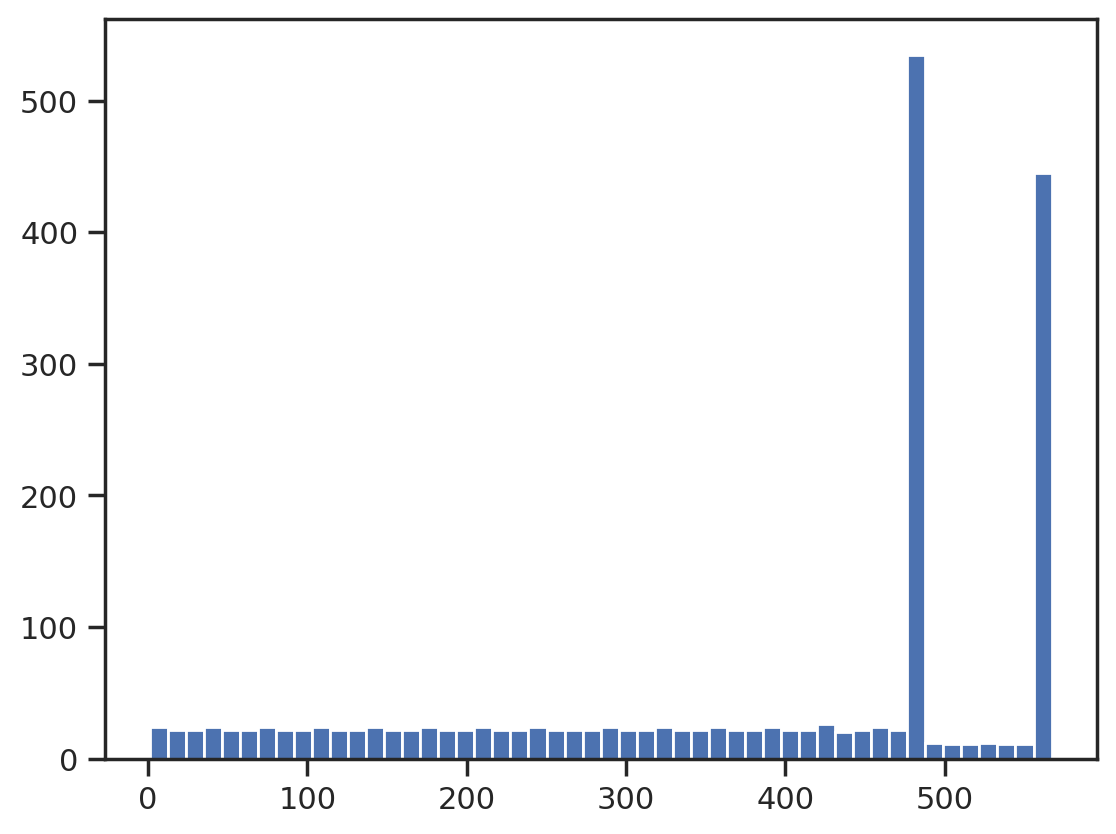

In [63]:
plt.hist(data_digit['alumni_employment'], 50)
plt.show()

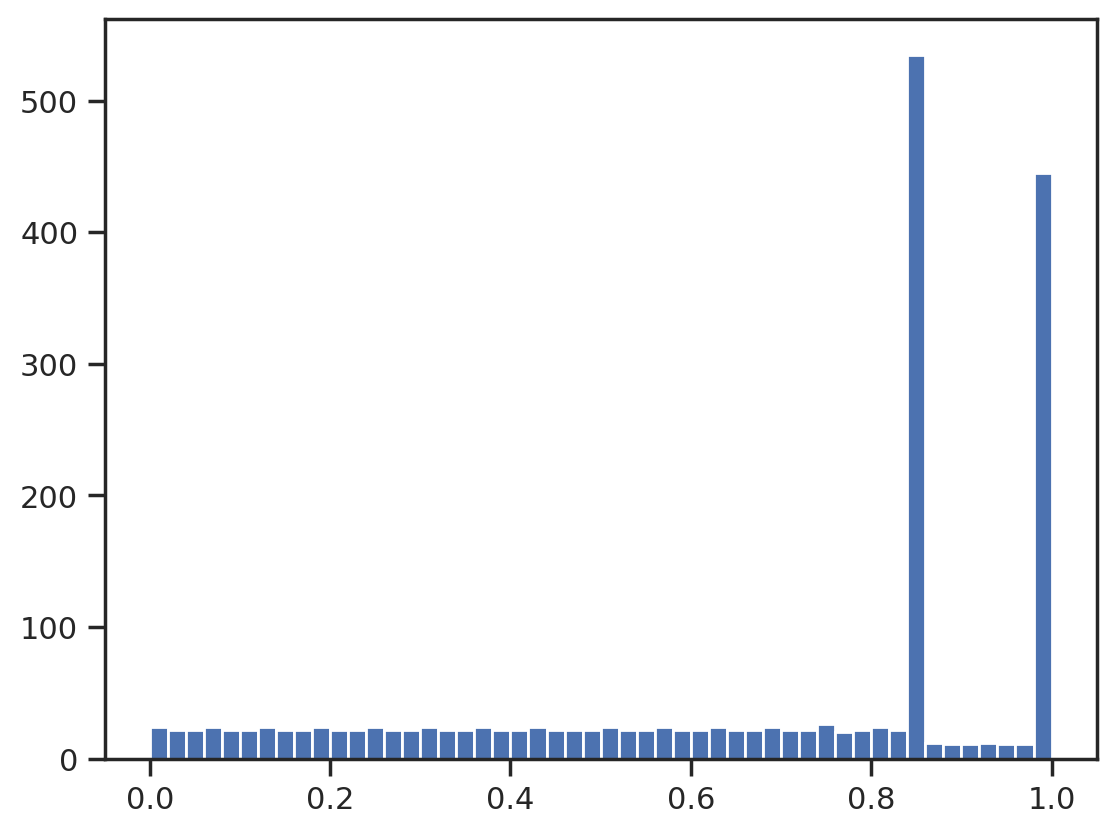

In [64]:
plt.hist(sc6_data, 50)
plt.show()

=====> `quality_of_faculty` <=====

In [65]:
sc7 = MinMaxScaler()
sc7_data = sc7.fit_transform(data_digit[['quality_of_faculty']])

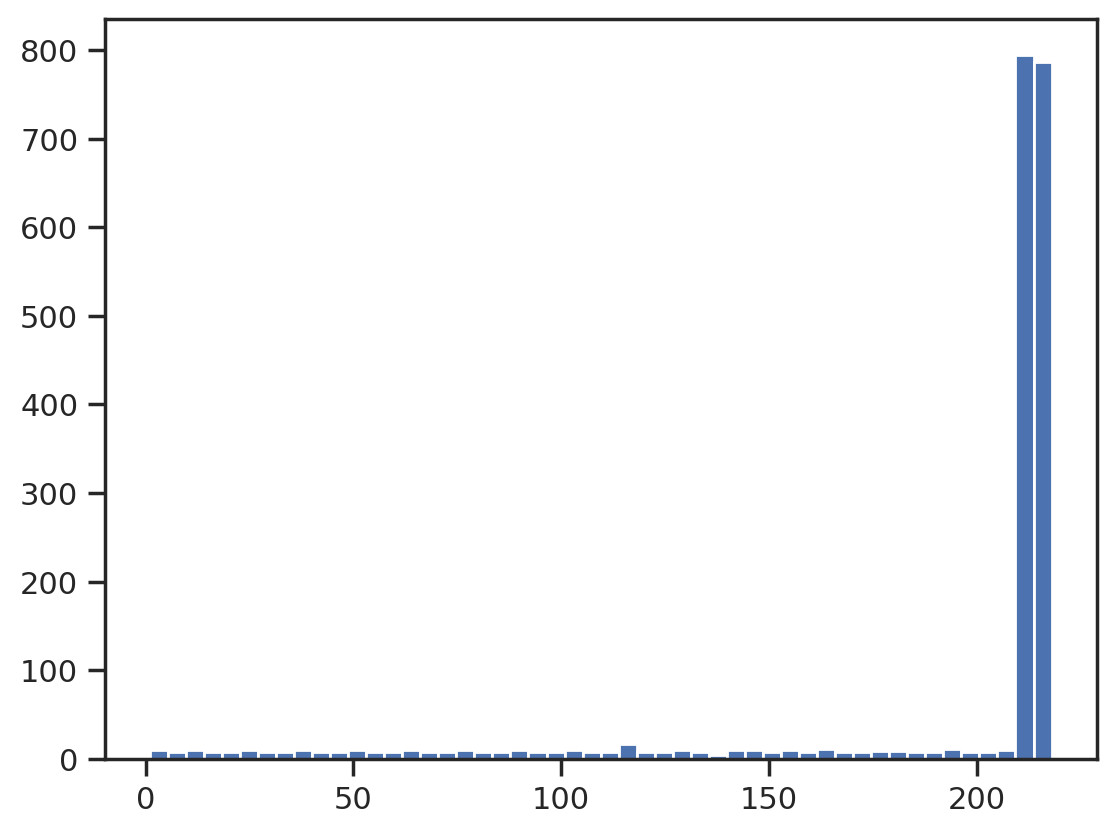

In [66]:
plt.hist(data_digit['quality_of_faculty'], 50)
plt.show()

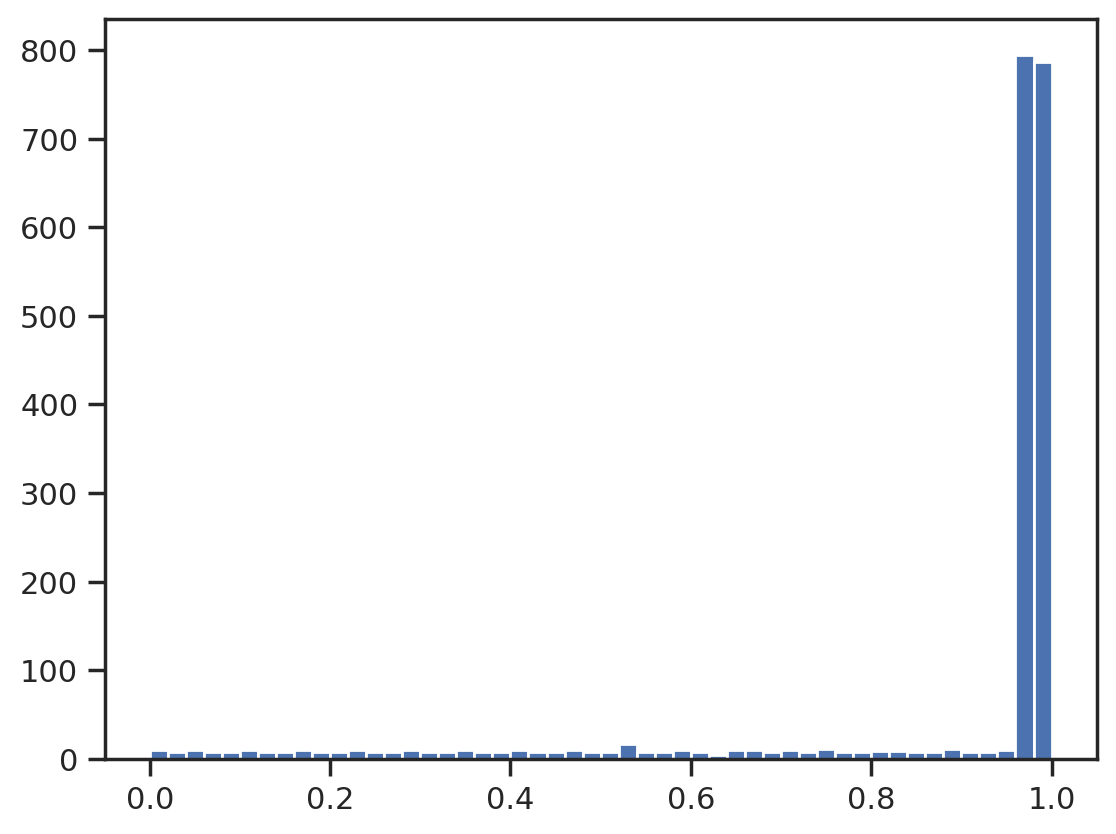

In [67]:
plt.hist(sc7_data, 50)
plt.show()

=====> `publications` <=====

In [68]:
sc8 = MinMaxScaler()
sc8_data = sc8.fit_transform(data_digit[['publications']])

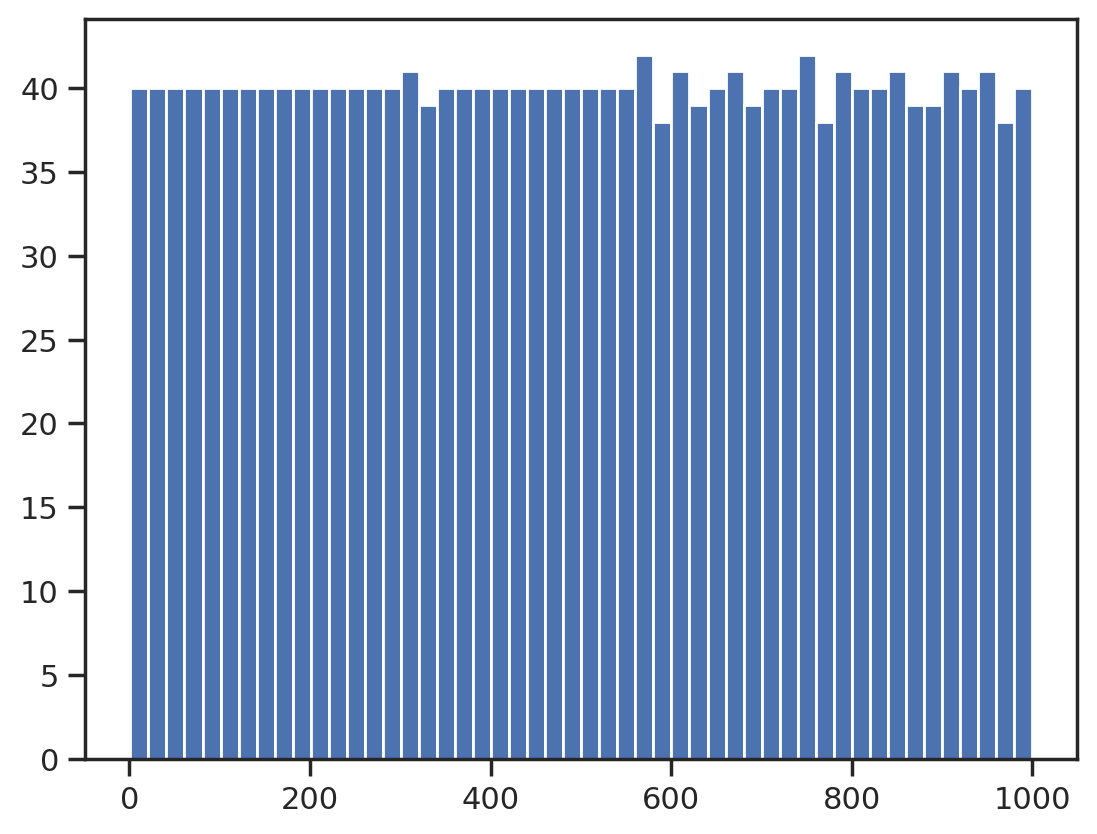

In [69]:
plt.hist(data_digit['publications'], 50)
plt.show()

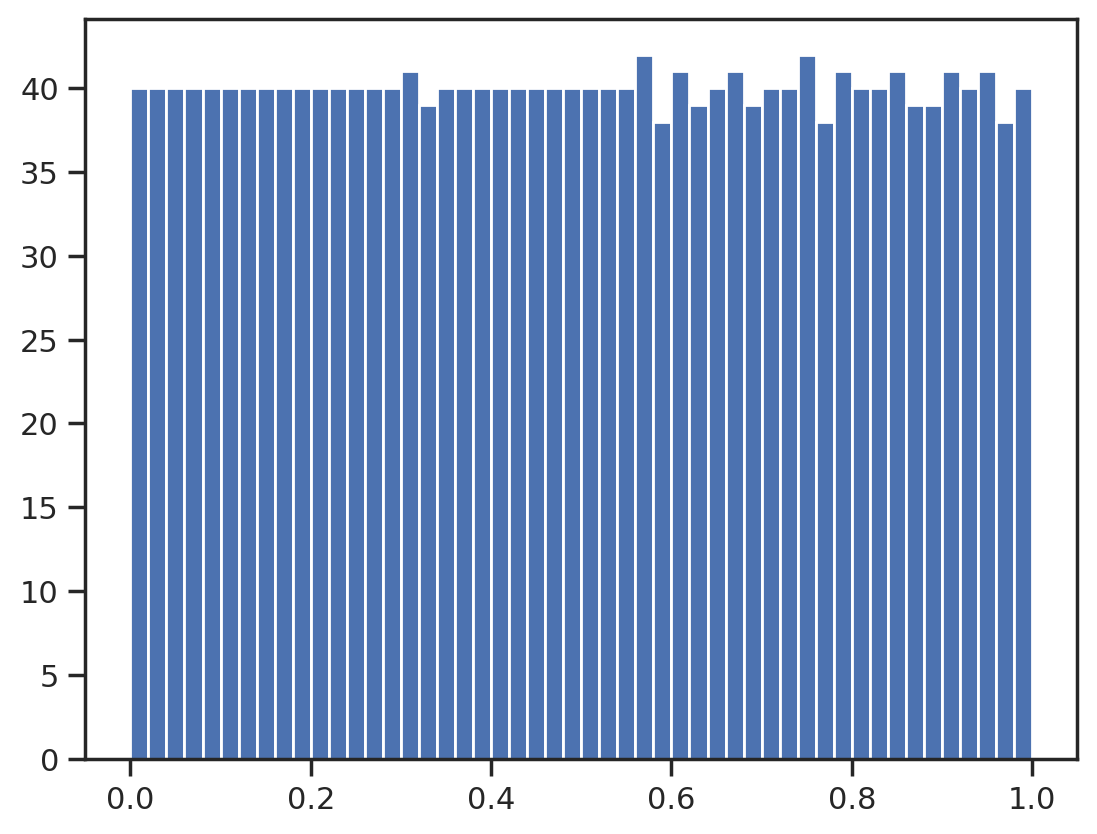

In [70]:
plt.hist(sc8_data, 50)
plt.show()

=====> `influence` <=====

In [71]:
sc9 = MinMaxScaler()
sc9_data = sc9.fit_transform(data_digit[['influence']])

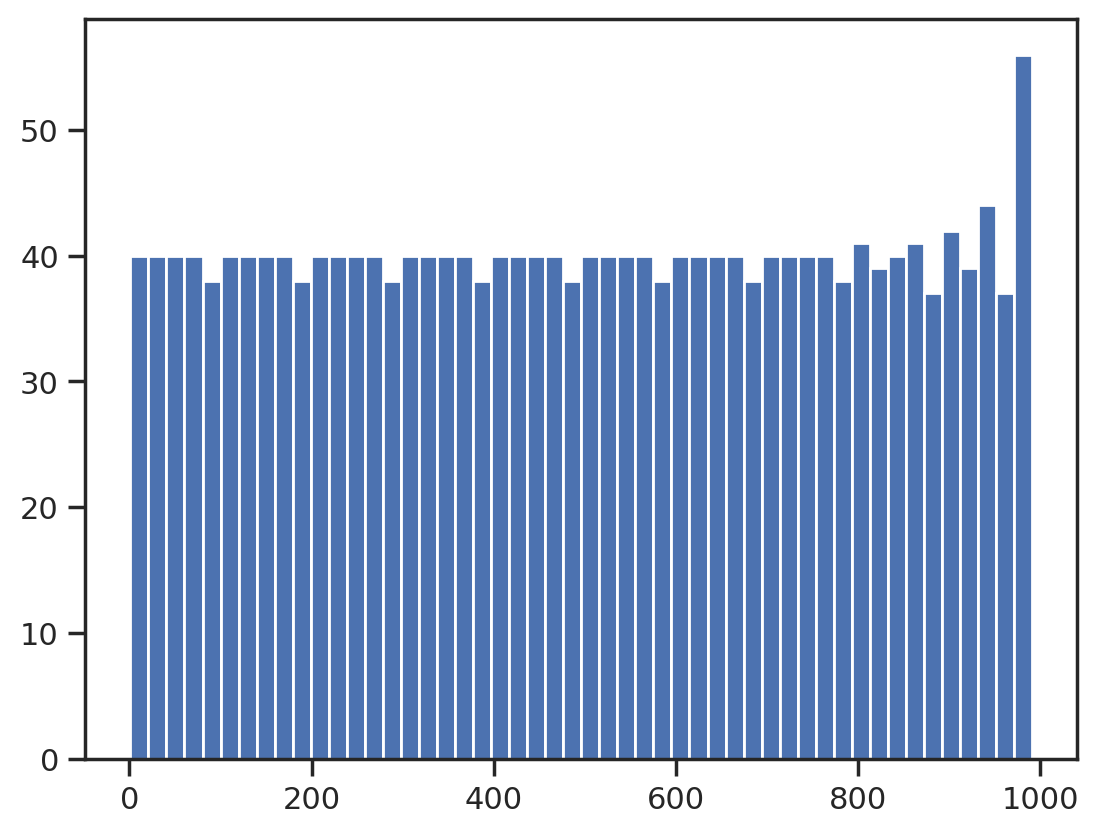

In [72]:
plt.hist(data_digit['influence'], 50)
plt.show()

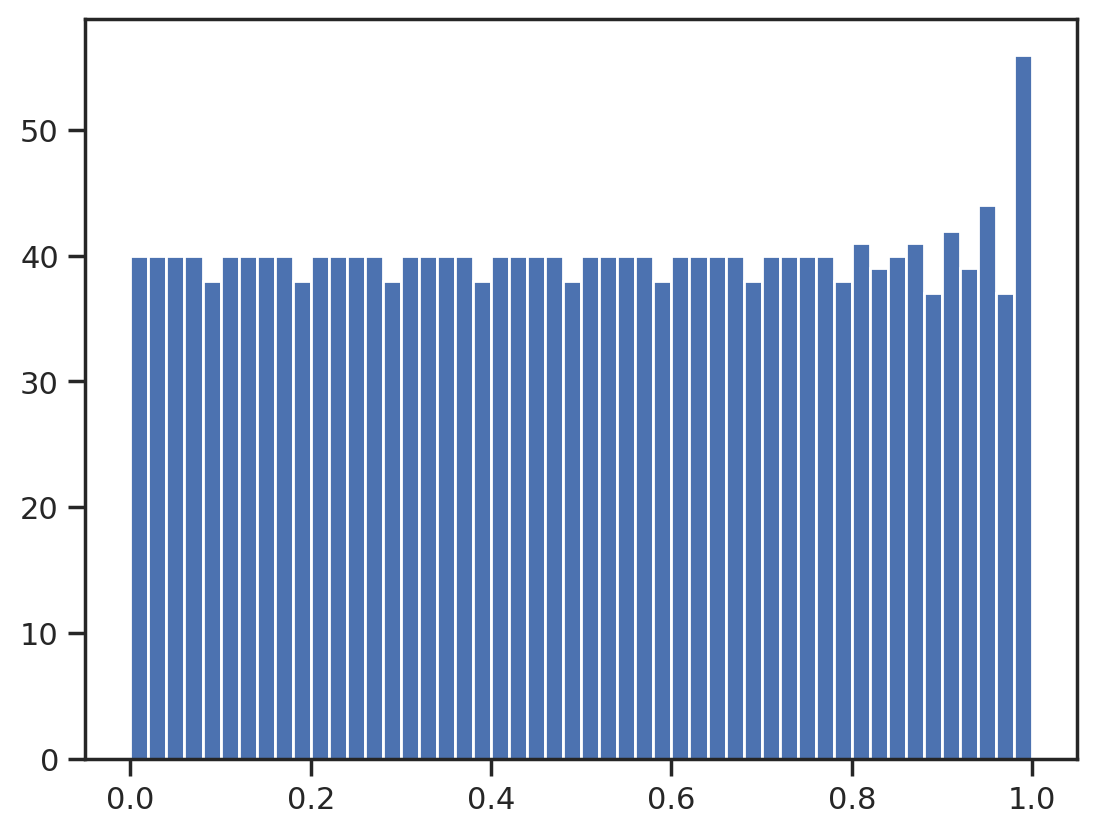

In [73]:
plt.hist(sc9_data, 50)
plt.show()

=====> `citations` <=====

In [74]:
sc10 = MinMaxScaler()
sc10_data = sc10.fit_transform(data_digit[['citations']])

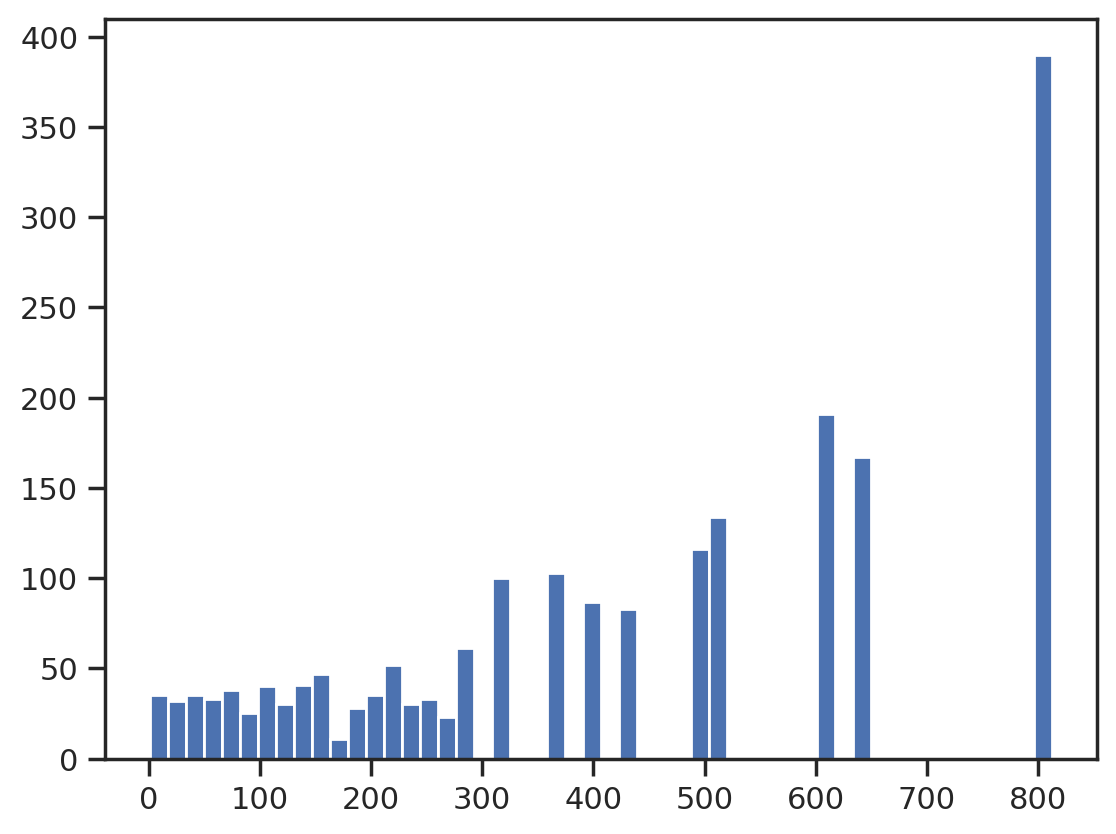

In [75]:
plt.hist(data_digit['citations'], 50)
plt.show()

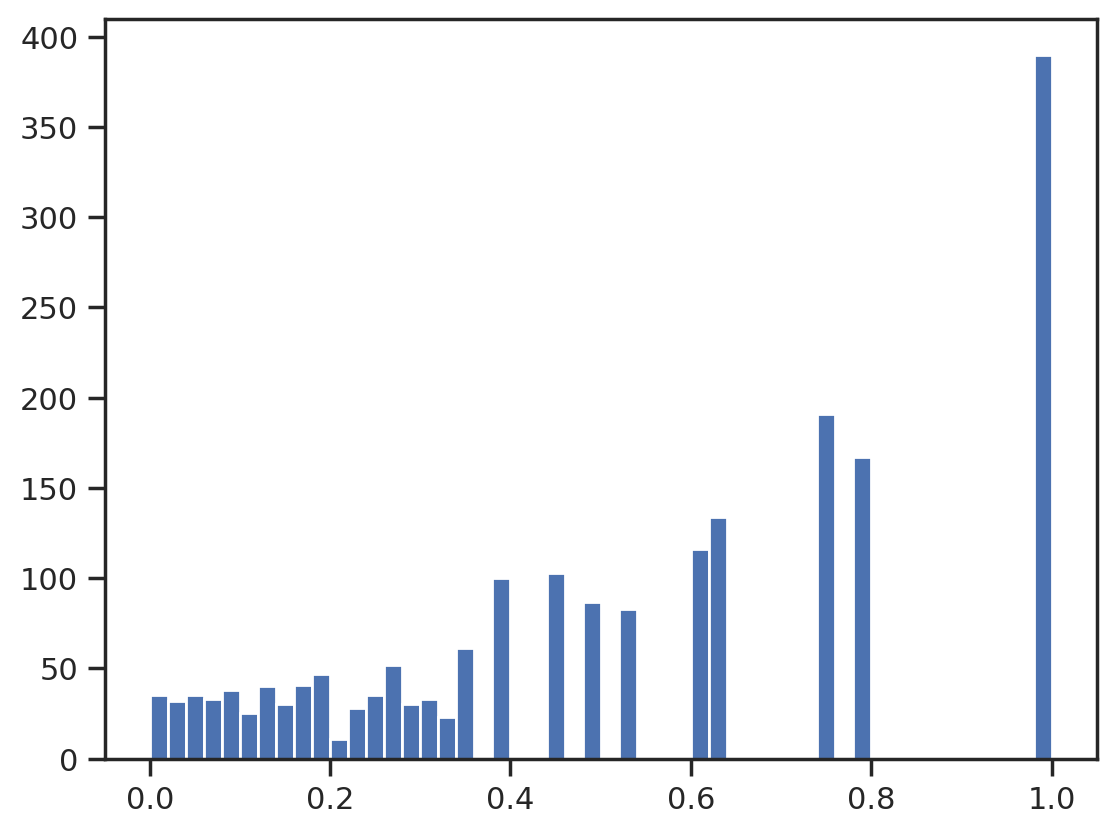

In [76]:
plt.hist(sc10_data, 50)
plt.show()

=====> `broad_impact` <=====

In [77]:
sc11 = MinMaxScaler()
sc11_data = sc11.fit_transform(data_digit[['broad_impact']])

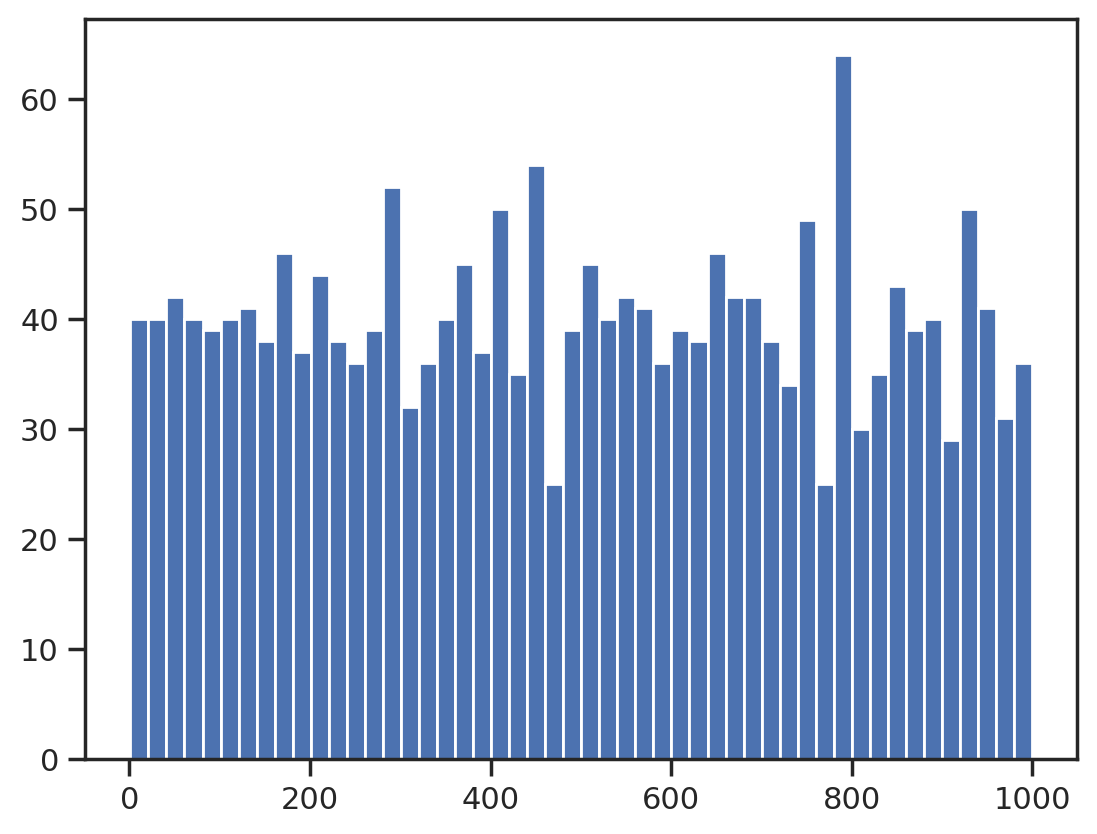

In [78]:
plt.hist(data_digit['broad_impact'], 50)
plt.show()

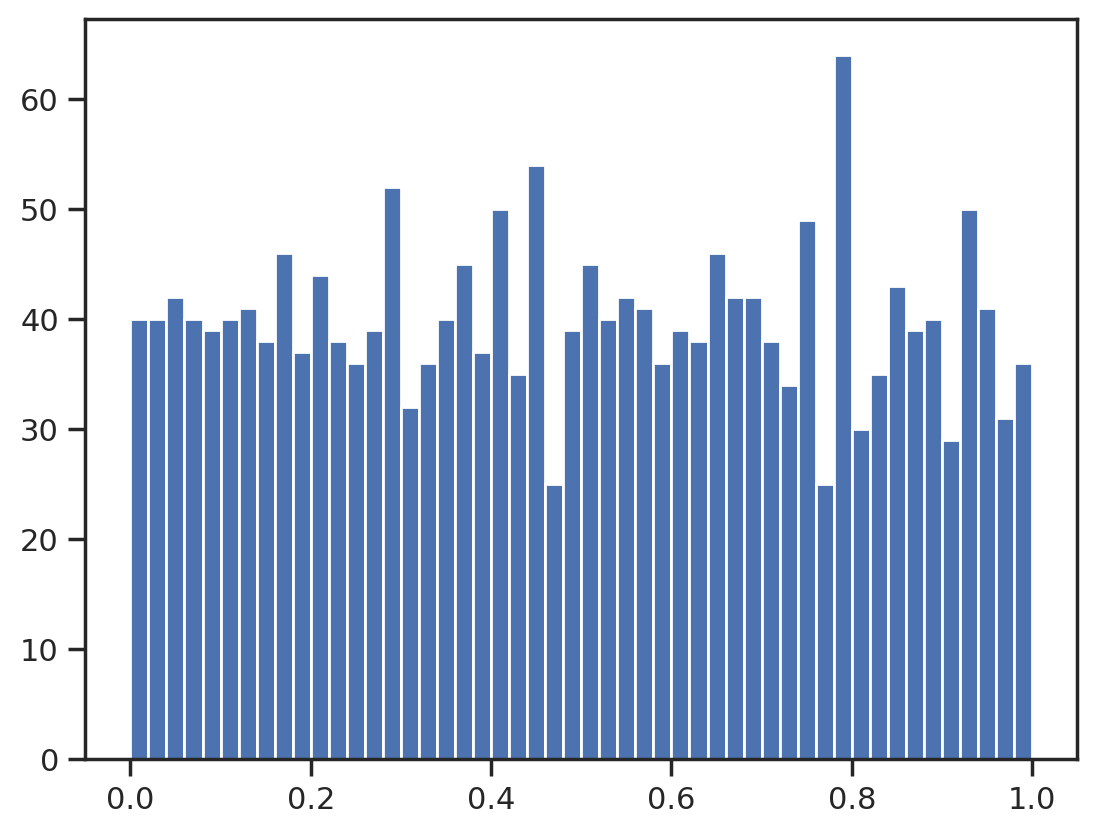

In [79]:
plt.hist(sc11_data, 50)
plt.show()

=====> `patents` <=====

In [80]:
sc12 = MinMaxScaler()
sc12_data = sc12.fit_transform(data_digit[['patents']])

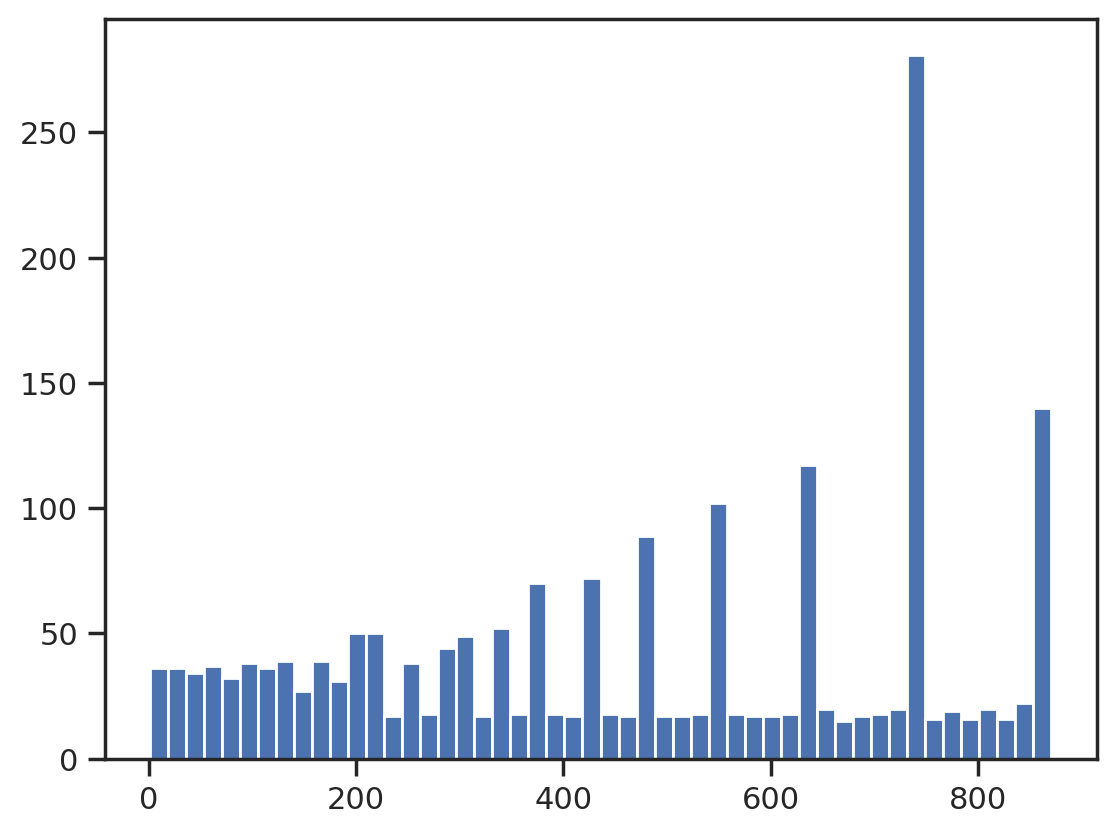

In [81]:
plt.hist(data_digit['patents'], 50)
plt.show()

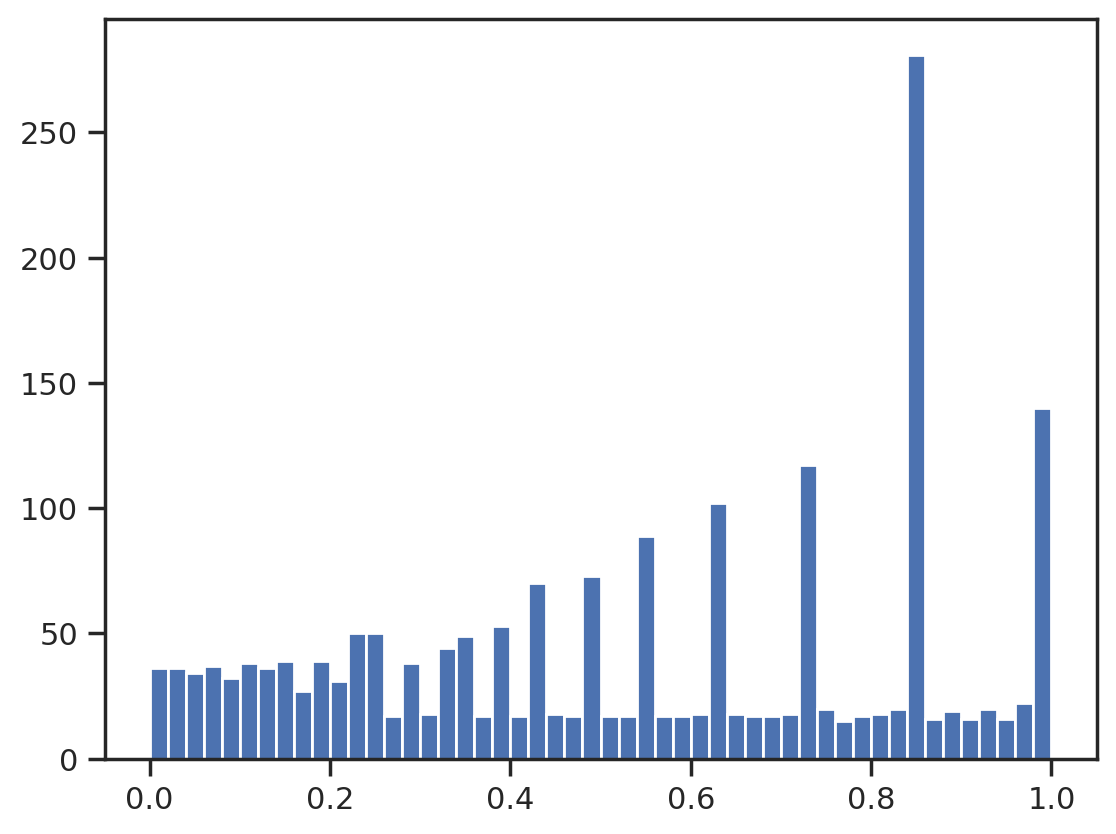

In [82]:
plt.hist(sc12_data, 50)
plt.show()

=====> `score` <=====

In [83]:
sc13 = MinMaxScaler()
sc13_data = sc13.fit_transform(data_digit[['score']])

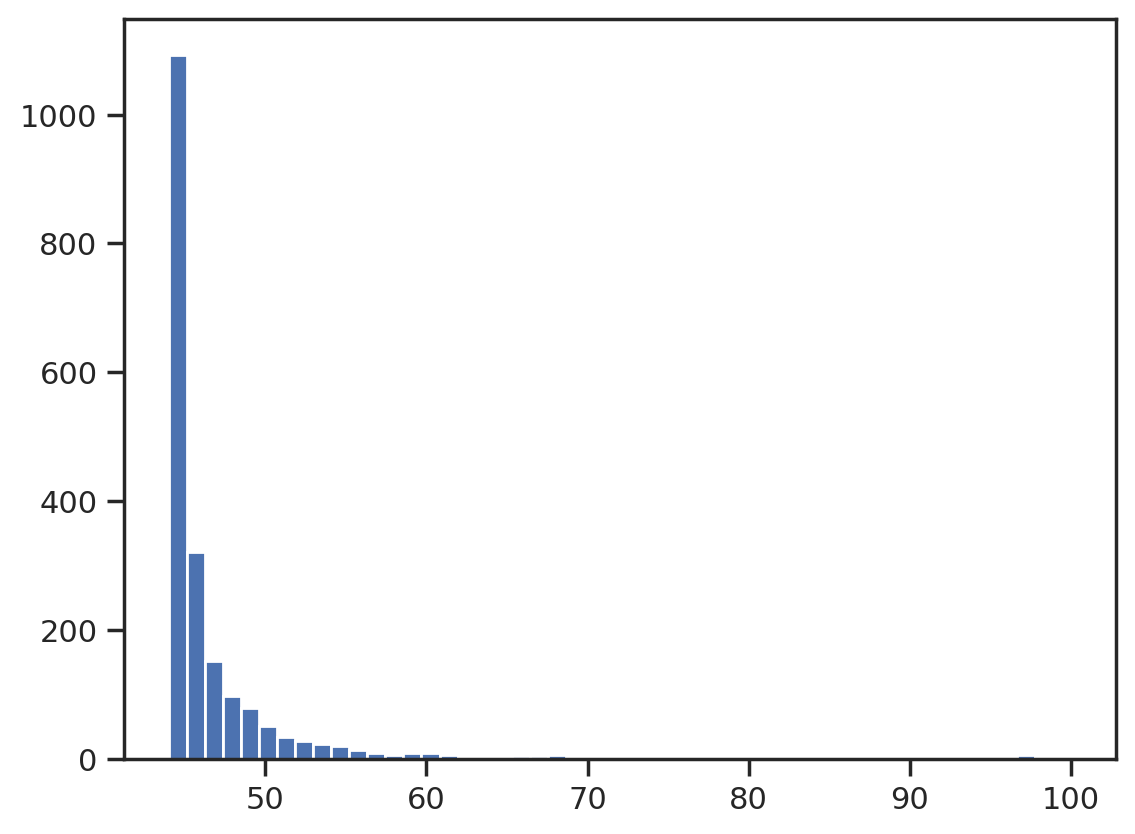

In [84]:
plt.hist(data_digit['score'], 50)
plt.show()

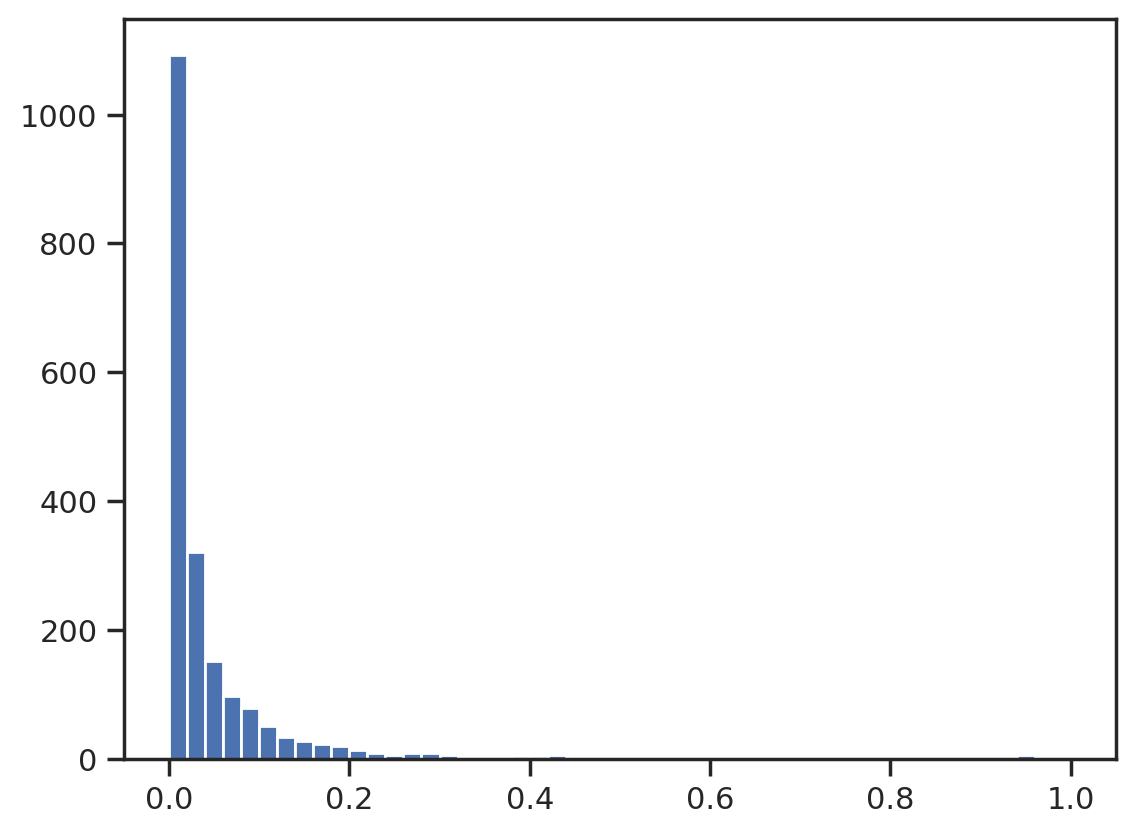

In [85]:
plt.hist(sc13_data, 50)
plt.show()

=====> `year` <=====

In [86]:
sc14 = MinMaxScaler()
sc14_data = sc14.fit_transform(data_digit[['year']])

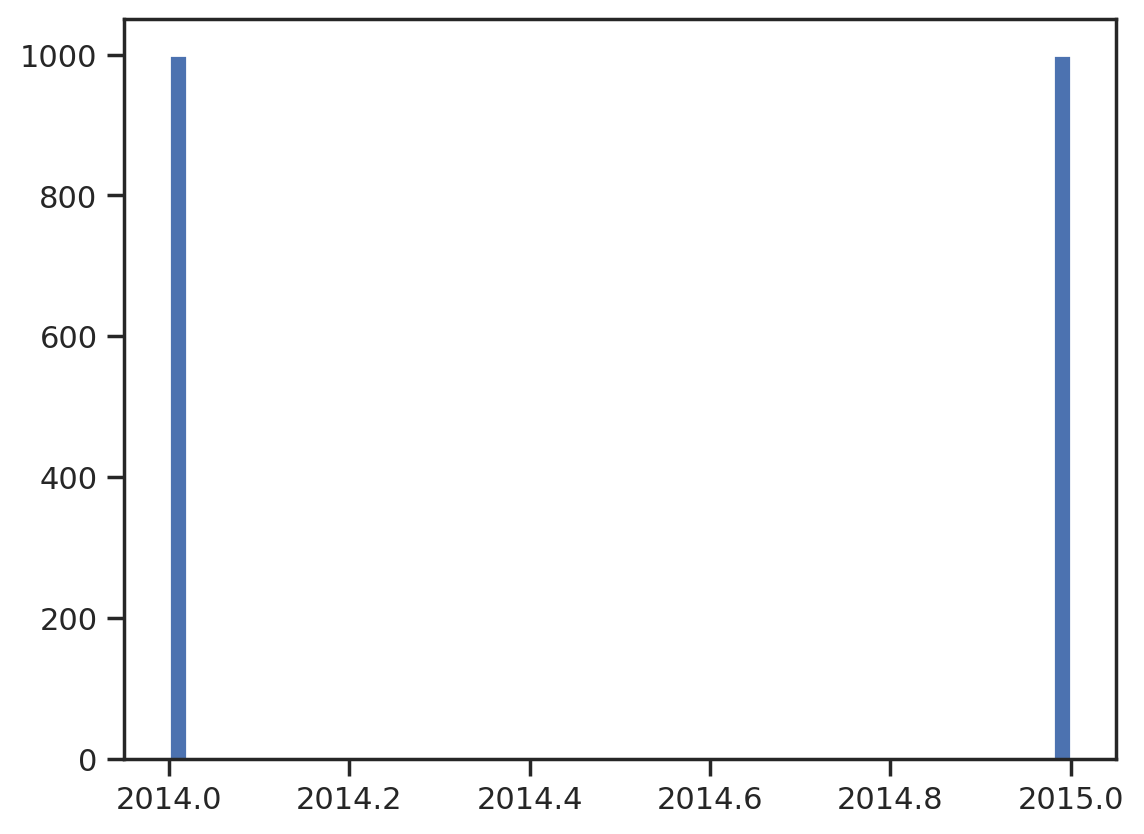

In [87]:
plt.hist(data_digit['year'], 50)
plt.show()

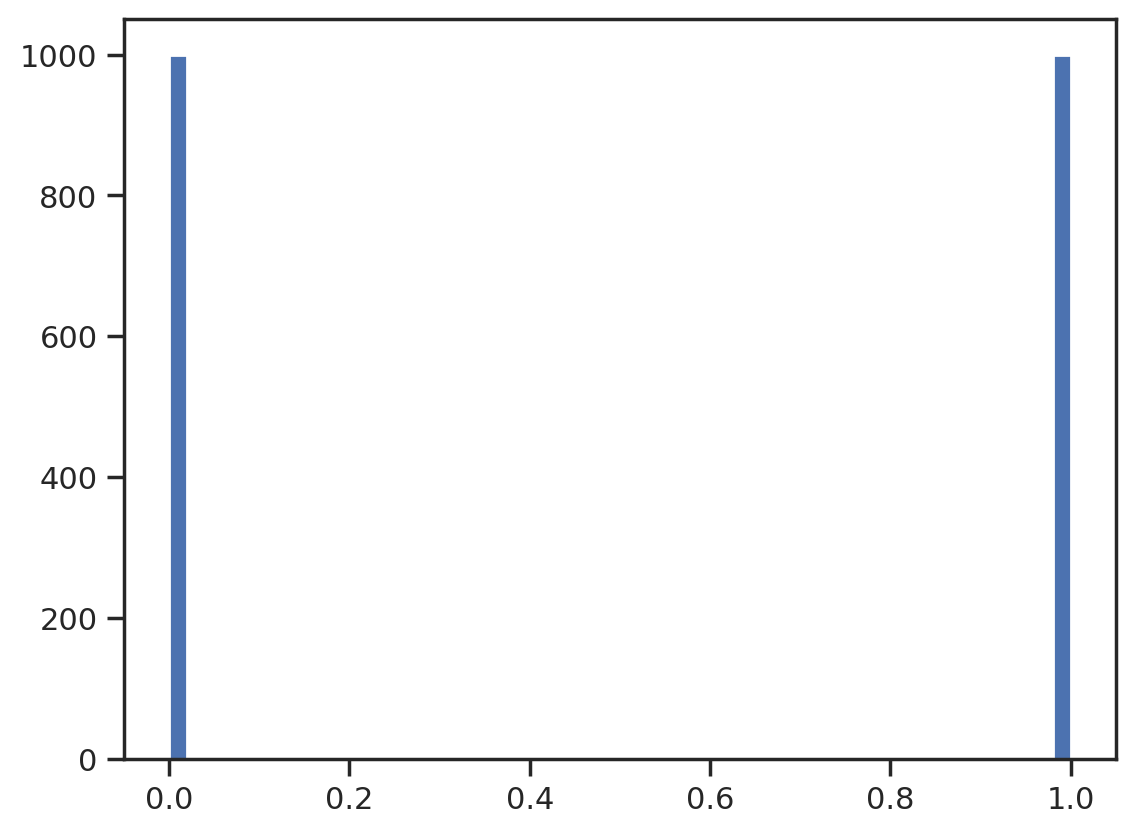

In [88]:
plt.hist(sc14_data, 50)
plt.show()

### Сболка отмасштабированных данных в dataset

In [89]:
data_normal = data_digit.copy()
data_normal['world_rank'] = sc1_data
data_normal['institution'] = sc2_data
data_normal['country'] = sc3_data
data_normal['national_rank'] = sc4_data
data_normal['quality_of_education'] = sc5_data
data_normal['alumni_employment'] = sc6_data
data_normal['quality_of_faculty'] = sc7_data
data_normal['publications'] = sc8_data
data_normal['influence'] = sc9_data
data_normal['citations'] = sc10_data
data_normal['broad_impact'] = sc11_data
data_normal['patents'] = sc12_data
data_normal['score'] = sc13_data
data_normal['year'] = sc14_data

In [90]:
data_normal

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,0.000000,0.180039,0.931034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001149,1.000000,0.0
201,0.003003,0.500000,0.931034,0.004386,0.027322,0.001767,0.013825,0.004004,0.002020,0.002466,0.003003,0.005747,0.983744,0.0
202,0.001001,0.305284,0.931034,0.008772,0.005464,0.017668,0.004608,0.014014,0.001010,0.001233,0.001001,0.000000,0.976599,0.0
203,0.012012,0.623288,0.982759,0.000000,0.002732,0.015901,0.018433,0.009009,0.008081,0.013564,0.012012,0.054023,0.957842,0.0
204,0.011011,0.801370,0.982759,0.004386,0.016393,0.019435,0.041475,0.010010,0.011111,0.012330,0.011011,0.017241,0.955520,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0.968969,0.933464,0.637931,0.026316,1.000000,1.000000,1.000000,0.925926,0.852525,1.000000,0.968969,0.936782,0.000179,1.0
2196,0.980981,0.010763,0.241379,0.013158,0.642077,0.998233,1.000000,0.996997,0.916162,0.794081,0.980981,1.000000,0.000179,1.0
2197,0.974975,0.129159,0.068966,0.074561,1.000000,0.968198,1.000000,0.829830,0.830303,1.000000,0.974975,0.945977,0.000179,1.0
2198,0.974975,0.563601,0.827586,0.171053,1.000000,1.000000,1.000000,0.885886,0.982828,1.000000,0.974975,0.747126,0.000000,1.0


### Масштабирование данных на основе Z-оценки - StandardScaler

In [91]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data_digit[['broad_impact']])

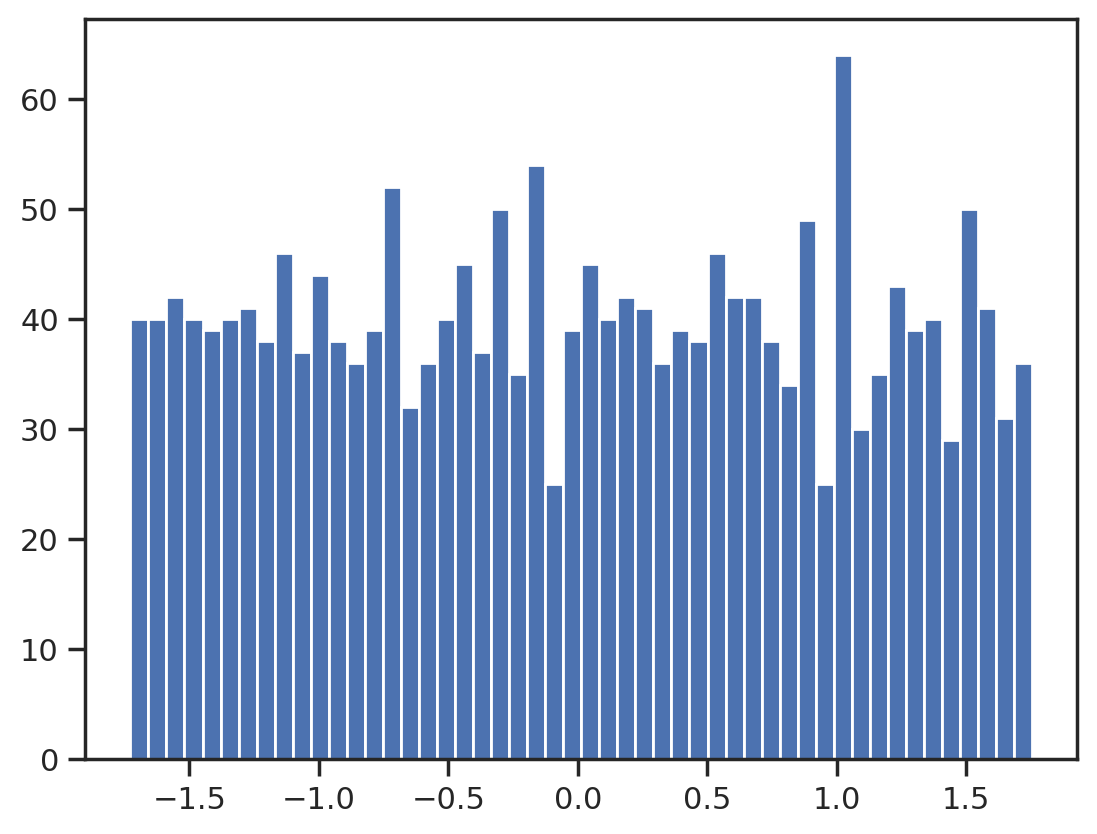

In [92]:
plt.hist(sc2_data, 50)
plt.show()

### Масштабирование данных на основе медианы "Mean Normalisation"

Поскольку нет стандартного класса, то используем реализацию на основе Pandas из лекции:

In [93]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = data_digit.mean(axis=0)
        maxs = data_digit.max(axis=0)
        mins = data_digit.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

Теперь выполним нормализацию этим способом...

=====> `world_rank` <=====

In [94]:
sc3 = MeanNormalisation()
sc3_data = sc3.fit_transform(data_digit)

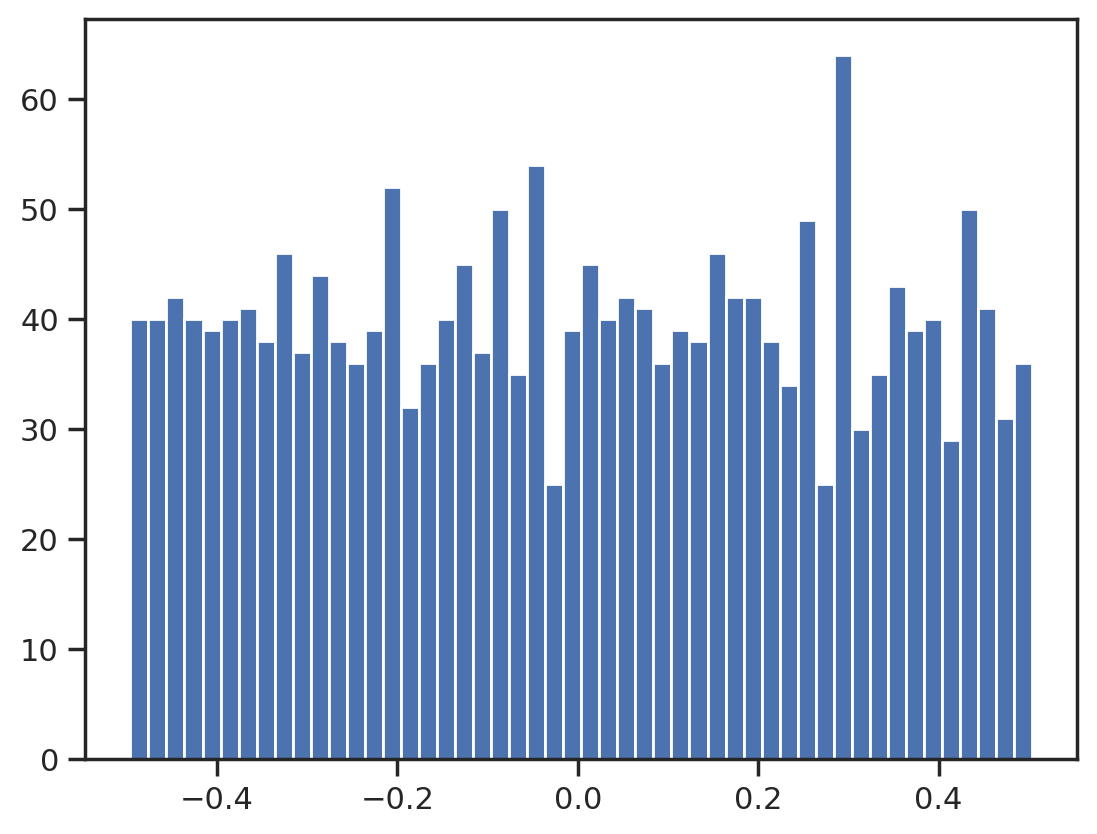

In [95]:
plt.hist(sc3_data[['broad_impact']], 50)
plt.show()

In [96]:
sc3_data

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,-0.500000,-0.320699,0.360345,-0.182096,-0.806015,-0.678911,-0.876164,-0.499915,-0.504262,-0.552826,-0.496196,-0.538300,0.945559,-0.5
201,-0.498999,-0.000738,0.360345,-0.177711,-0.778693,-0.677144,-0.862339,-0.495911,-0.502241,-0.550359,-0.493193,-0.533702,0.929303,-0.5
202,-0.497998,-0.195454,0.360345,-0.173325,-0.800551,-0.661243,-0.871555,-0.485901,-0.503252,-0.551592,-0.495195,-0.539449,0.922157,-0.5
203,-0.496997,0.122550,0.412069,-0.182096,-0.803283,-0.663010,-0.857730,-0.490906,-0.496181,-0.539262,-0.484184,-0.485426,0.903401,-0.5
204,-0.495996,0.300632,0.412069,-0.177711,-0.789622,-0.659476,-0.834689,-0.489905,-0.493151,-0.540495,-0.485185,-0.522208,0.901078,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0.495996,0.432726,0.067241,-0.155781,0.193985,0.321089,0.123836,0.426011,0.348264,0.447174,0.472773,0.397332,-0.054263,0.5
2196,0.496997,-0.489975,-0.329310,-0.168939,-0.163939,0.319322,0.123836,0.497082,0.411900,0.241256,0.484785,0.460551,-0.054263,0.5
2197,0.497998,-0.371579,-0.501724,-0.107535,0.193985,0.289287,0.123836,0.329915,0.326041,0.447174,0.478779,0.406528,-0.054263,0.5
2198,0.498999,0.062863,0.256897,-0.011044,0.193985,0.321089,0.123836,0.385971,0.478567,0.447174,0.478779,0.207677,-0.054441,0.5


В дальнейшем будем использовать результаты MinMax масштабирования

## Обработка нестандартного типа данных

В данном разделе будем использовать набор данных о погоде. Выполним обработку первого столбца этого датасета.

Подключаем датасет:

In [97]:
data_weather = pd.read_csv('Beach_Weather_Stations_-_Automated_Sensors.csv', sep=",")

Размер набора данных

In [98]:
data_weather.shape

(156051, 18)

Типы колонок

In [99]:
data_weather.dtypes

Station Name                    object
Measurement Timestamp           object
Air Temperature                float64
Wet Bulb Temperature           float64
Humidity                         int64
Rain Intensity                 float64
Interval Rain                  float64
Total Rain                     float64
Precipitation Type             float64
Wind Direction                   int64
Wind Speed                     float64
Maximum Wind Speed             float64
Barometric Pressure            float64
Solar Radiation                  int64
Heading                        float64
Battery Life                   float64
Measurement Timestamp Label     object
Measurement ID                  object
dtype: object

Первые 5 строк датасета

In [100]:
data_weather.head()

,Station Name,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Measurement Timestamp Label,Measurement ID
0,63rd Street Weather Station,09/27/2018 10:00:00 AM,16.40,12.2,61,0.0,0.0,260.3,0.0,231,2.5,4.7,996.3,484,356.0,11.9,09/27/2018 10:00 AM,63rdStreetWeatherStation201809271000
1,63rd Street Weather Station,09/27/2018 11:00:00 AM,17.10,11.5,51,0.0,0.0,260.3,0.0,244,3.6,5.7,995.4,468,356.0,11.9,09/27/2018 11:00 AM,63rdStreetWeatherStation201809271100
2,63rd Street Weather Station,09/27/2018 01:00:00 PM,18.20,12.4,51,0.0,0.0,260.3,0.0,248,3.1,5.3,994.8,377,355.0,11.9,09/27/2018 1:00 PM,63rdStreetWeatherStation201809271300
3,Foster Weather Station,09/27/2018 01:00:00 PM,17.89,NaN,39,NaN,0.0,NaN,NaN,249,1.4,2.3,993.6,0,NaN,15.1,09/27/2018 1:00 PM,FosterWeatherStation201809271300
4,63rd Street Weather Station,09/27/2018 03:00:00 PM,19.50,13.0,47,0.0,0.0,260.3,0.0,249,3.1,5.7,992.9,461,355.0,11.9,09/27/2018 3:00 PM,63rdStreetWeatherStation201809271500


Показывать обработку будем на примере столбца `Measurement Timestamp`. Проверим, что он не содержит пропусков.

In [101]:
data_weather.isnull().sum()

Station Name                       0
Measurement Timestamp              0
Air Temperature                   75
Wet Bulb Temperature           55305
Humidity                           0
Rain Intensity                 55305
Interval Rain                      0
Total Rain                     55305
Precipitation Type             55305
Wind Direction                     0
Wind Speed                         0
Maximum Wind Speed                 0
Barometric Pressure              146
Solar Radiation                    0
Heading                        55305
Battery Life                       0
Measurement Timestamp Label        0
Measurement ID                     0
dtype: int64

Далее преобразуем оба столбца с датами к типу даты и времени даты и времени

In [102]:
data_weather['Measurement Timestamp'] = pd.to_datetime(data_weather['Measurement Timestamp'])
data_weather['Measurement Timestamp Label'] = pd.to_datetime(data_weather['Measurement Timestamp Label'])

In [103]:
data_weather.dtypes

Station Name                           object
Measurement Timestamp          datetime64[ns]
Air Temperature                       float64
Wet Bulb Temperature                  float64
Humidity                                int64
Rain Intensity                        float64
Interval Rain                         float64
Total Rain                            float64
Precipitation Type                    float64
Wind Direction                          int64
Wind Speed                            float64
Maximum Wind Speed                    float64
Barometric Pressure                   float64
Solar Radiation                         int64
Heading                               float64
Battery Life                          float64
Measurement Timestamp Label    datetime64[ns]
Measurement ID                         object
dtype: object

Также можно извлечь из этого типа данных год, месяц и день. Это позволит в будущем закодировать эти признаки

In [104]:
data_weather['year'] = data_weather['Measurement Timestamp'].dt.year
data_weather['month'] = data_weather['Measurement Timestamp'].dt.month
data_weather['day'] = data_weather['Measurement Timestamp'].dt.day

Выведем первые 5 строк набора данных

In [105]:
data_weather.head()

,Station Name,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,...,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Measurement Timestamp Label,Measurement ID,year,month,day
0,63rd Street Weather Station,2018-09-27 10:00:00,16.40,12.2,61,0.0,0.0,260.3,0.0,231,...,4.7,996.3,484,356.0,11.9,2018-09-27 10:00:00,63rdStreetWeatherStation201809271000,2018,9,27
1,63rd Street Weather Station,2018-09-27 11:00:00,17.10,11.5,51,0.0,0.0,260.3,0.0,244,...,5.7,995.4,468,356.0,11.9,2018-09-27 11:00:00,63rdStreetWeatherStation201809271100,2018,9,27
2,63rd Street Weather Station,2018-09-27 13:00:00,18.20,12.4,51,0.0,0.0,260.3,0.0,248,...,5.3,994.8,377,355.0,11.9,2018-09-27 13:00:00,63rdStreetWeatherStation201809271300,2018,9,27
3,Foster Weather Station,2018-09-27 13:00:00,17.89,NaN,39,NaN,0.0,NaN,NaN,249,...,2.3,993.6,0,NaN,15.1,2018-09-27 13:00:00,FosterWeatherStation201809271300,2018,9,27
4,63rd Street Weather Station,2018-09-27 15:00:00,19.50,13.0,47,0.0,0.0,260.3,0.0,249,...,5.7,992.9,461,355.0,11.9,2018-09-27 15:00:00,63rdStreetWeatherStation201809271500,2018,9,27


Примечание: столбцы появились справа (нужно прокрутить полосу снизу)

## Отбор признаков

В данном разделе продолжаем работать с датасетом рейтингов университетов.

Проверим кореляцию данных

<Axes: >

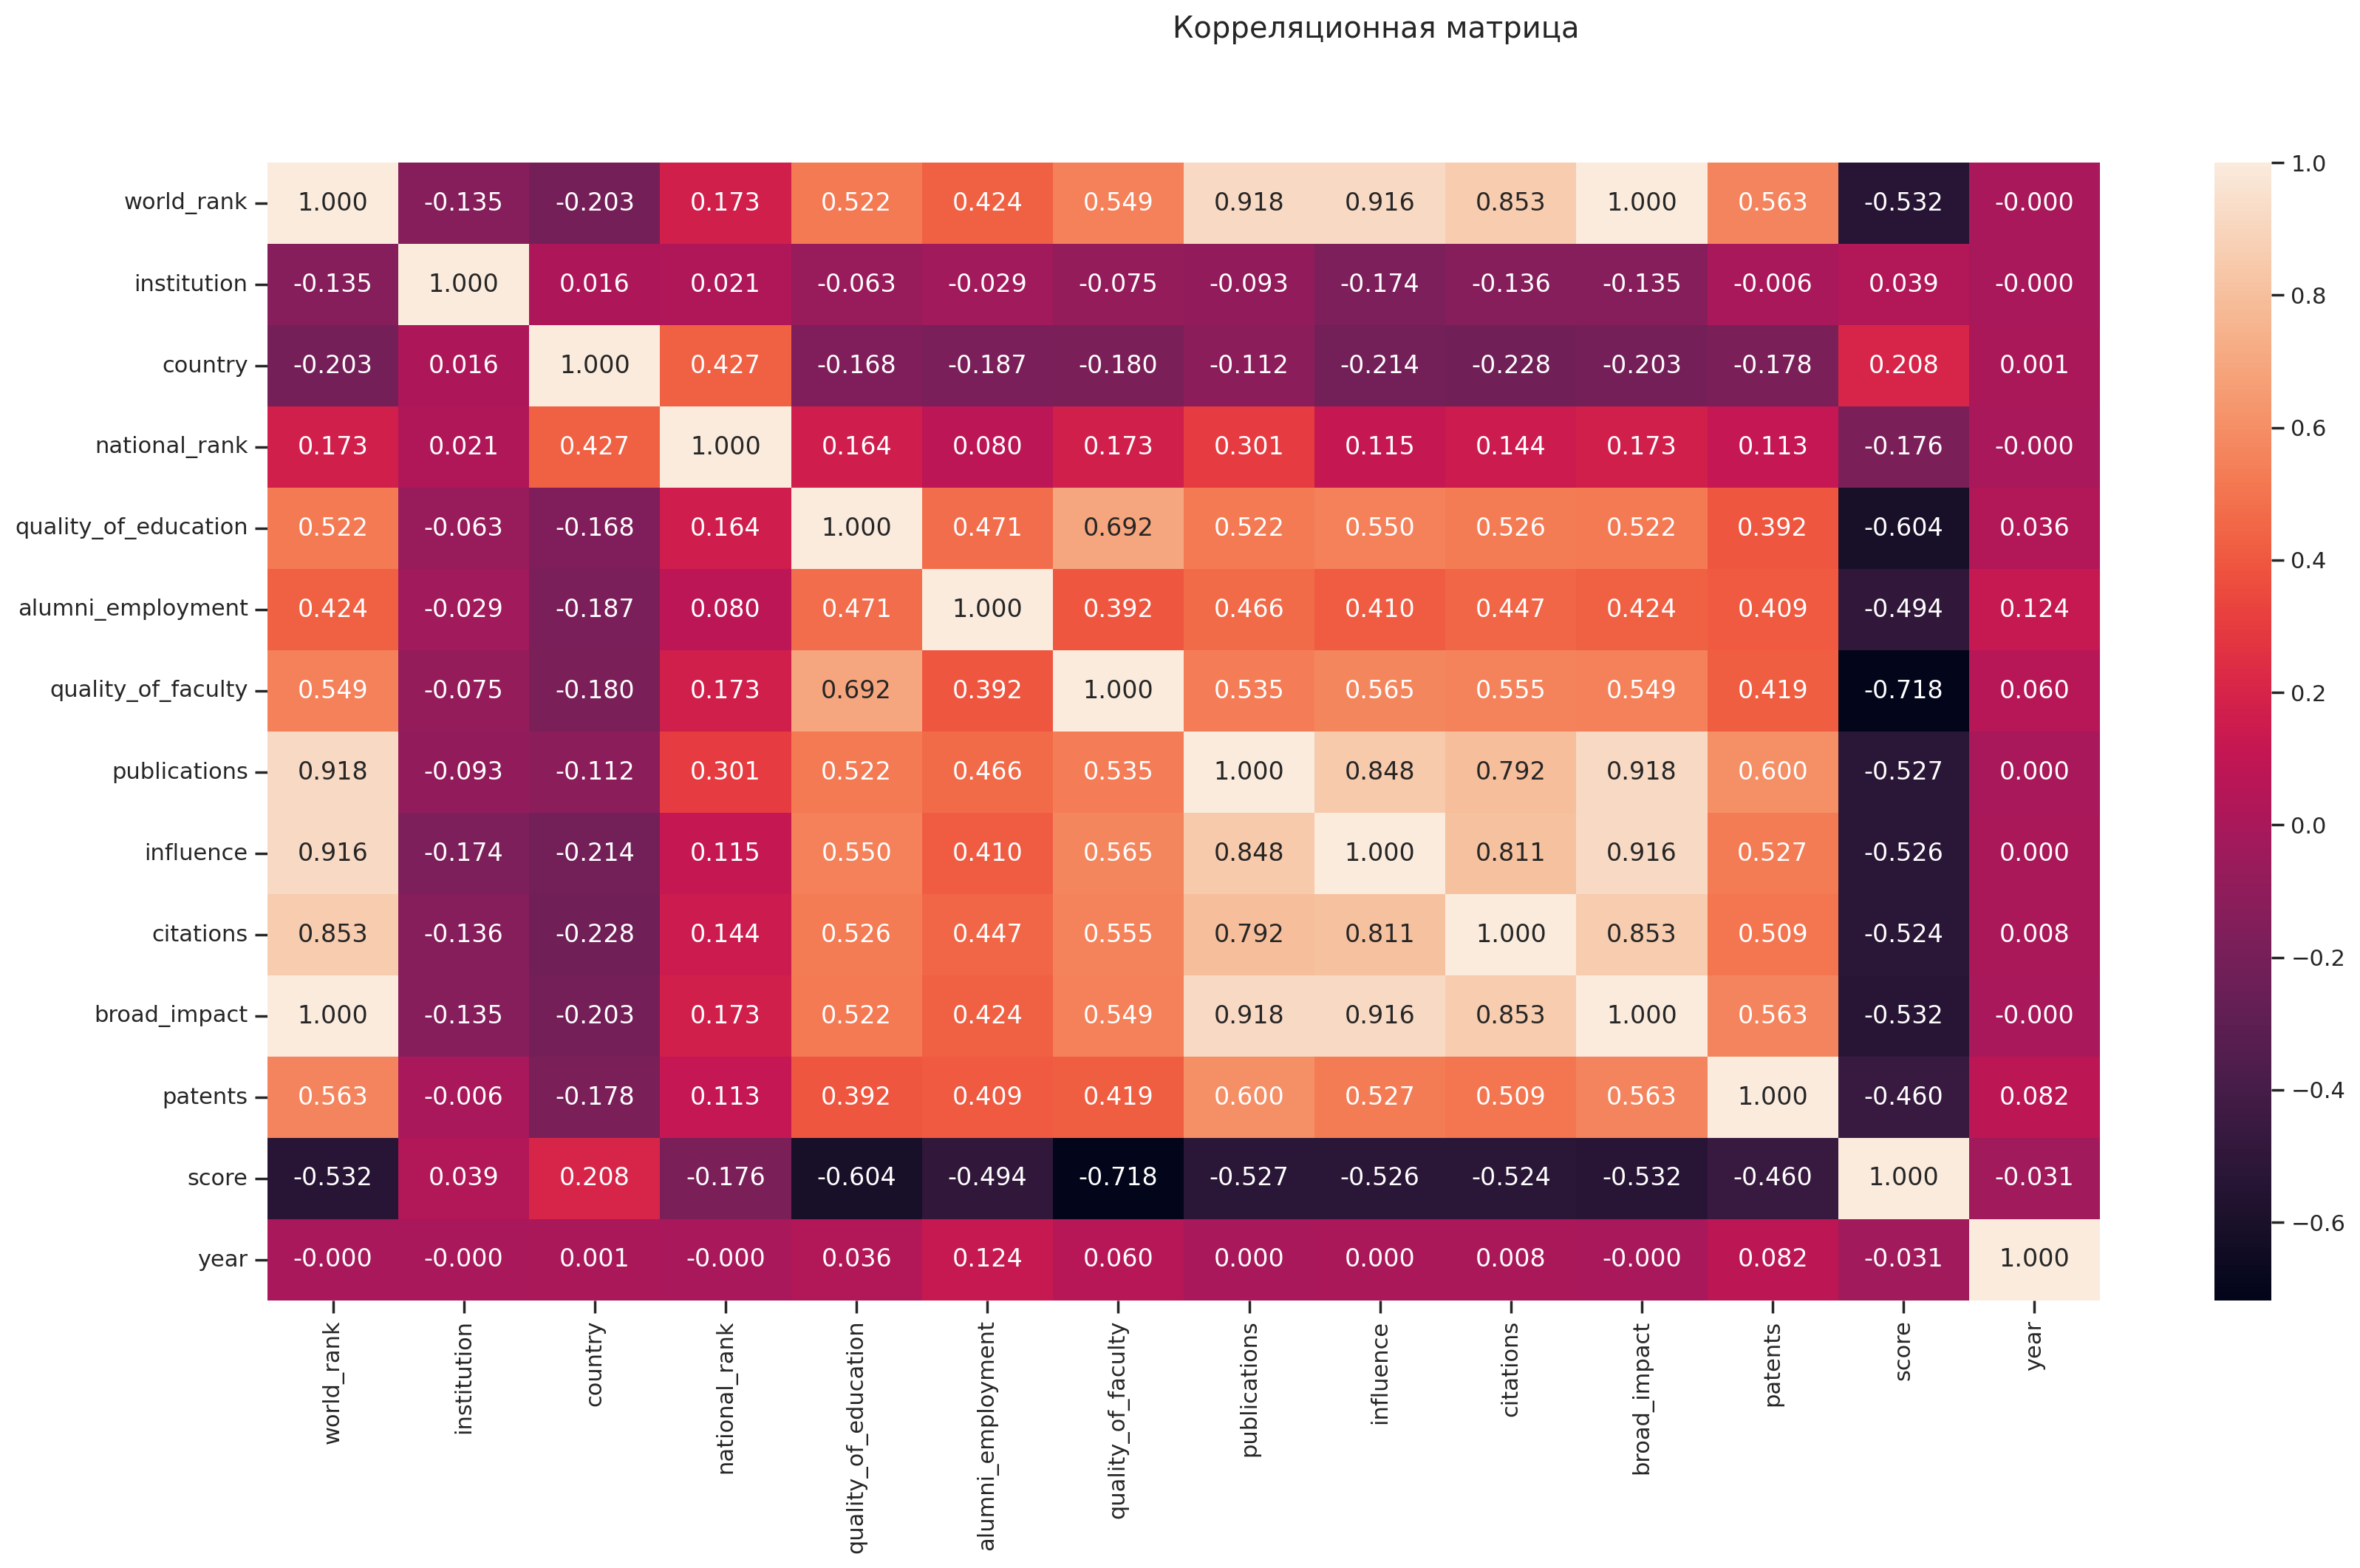

In [106]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data_normal.corr(), ax=ax, annot=True, fmt='.3f')

Целевой признак: `world_rank`

Разделим выборку на обучающую и тестовую

В исходном наборе данных целевой признак не отделён от остальных данных, поэтому выделим набор данных, не содержащий `world_rank`

In [108]:
data_x = data_normal.copy()
data_x = data_x.drop(columns='world_rank')
data_x

,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,0.180039,0.931034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001149,1.000000,0.0
201,0.500000,0.931034,0.004386,0.027322,0.001767,0.013825,0.004004,0.002020,0.002466,0.003003,0.005747,0.983744,0.0
202,0.305284,0.931034,0.008772,0.005464,0.017668,0.004608,0.014014,0.001010,0.001233,0.001001,0.000000,0.976599,0.0
203,0.623288,0.982759,0.000000,0.002732,0.015901,0.018433,0.009009,0.008081,0.013564,0.012012,0.054023,0.957842,0.0
204,0.801370,0.982759,0.004386,0.016393,0.019435,0.041475,0.010010,0.011111,0.012330,0.011011,0.017241,0.955520,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0.933464,0.637931,0.026316,1.000000,1.000000,1.000000,0.925926,0.852525,1.000000,0.968969,0.936782,0.000179,1.0
2196,0.010763,0.241379,0.013158,0.642077,0.998233,1.000000,0.996997,0.916162,0.794081,0.980981,1.000000,0.000179,1.0
2197,0.129159,0.068966,0.074561,1.000000,0.968198,1.000000,0.829830,0.830303,1.000000,0.974975,0.945977,0.000179,1.0
2198,0.563601,0.827586,0.171053,1.000000,1.000000,1.000000,0.885886,0.982828,1.000000,0.974975,0.747126,0.000000,1.0


In [109]:
data_y = data_normal['world_rank']
data_y

200     0.000000
201     0.003003
202     0.001001
203     0.012012
204     0.011011
          ...   
2195    0.968969
2196    0.980981
2197    0.974975
2198    0.974975
2199    0.980981
Name: world_rank, Length: 2000, dtype: float64

Зададим тестовую выборку с размером 10%

In [110]:
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=2024)

### Метод фильтрации

Создадим Data Frame с сильными корреляциями

In [111]:
def make_corr_df(df):
    cr = df.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [112]:
make_corr_df(data_normal)

,f1,f2,corr
0,broad_impact,publications,0.917878
1,publications,broad_impact,0.917878
2,publications,world_rank,0.917878
3,world_rank,publications,0.917878
4,influence,world_rank,0.916040
5,broad_impact,influence,0.916040
6,world_rank,influence,0.916040
7,influence,broad_impact,0.916040
8,citations,broad_impact,0.852638
9,world_rank,citations,0.852638


Получим группы коррелирующих признаков

In [113]:
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [114]:
corr_groups(make_corr_df(data_normal))

[['publications', 'influence', 'citations', 'broad_impact'],
 ['publications', 'influence', 'citations', 'world_rank']]

Вторая группа содержит целевой признак и ещё 3 признака, следовательно, основной вклад в рейтинг ВУЗа вносят следующие признаки:

* `publications`
* `influence`
* `citations`

### Метод обёртывания

Воспользуемся методом полного перебора

In [115]:
knn = KNeighborsRegressor(n_neighbors=3)

In [111]:
# Выполнение на этом наборе нерационально. Преведёт к зависанию ядра на несколько часов!!!
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(data_normal.drop('world_rank', axis=1), data_normal[['world_rank']])

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

DO NOT EXECUTE


### Метод вложений

Используем линейную ренрессию

In [125]:
e_ls1 = Lasso(random_state=1)
e_ls1.fit(data_X_train, data_y_train)
# Коэффициенты регрессии
list(zip(data.columns.tolist(), e_ls1.coef_))

[('world_rank', -0.0),
 ('institution', -0.0),
 ('country', 0.0),
 ('national_rank', 0.0),
 ('quality_of_education', 0.0),
 ('alumni_employment', 0.0),
 ('quality_of_faculty', 0.0),
 ('publications', 0.0),
 ('influence', 0.0),
 ('citations', 0.0),
 ('broad_impact', 0.0),
 ('patents', -0.0),
 ('score', 0.0)]

Как видим, линейная регрессия вернула везде нулевые коеффициенты.